In [1]:
%matplotlib notebook

import os
import glob
import numpy as np
import struct as st
import pandas as pd
import matplotlib.pyplot as plt
import obspy as obs
#import datetime
#begin_time = datetime.datetime.now()
            
            #print(datetime.datetime.now() - begin_time)
    
            #---------------------------------------
        
            # считаем вступление, создаём даты, рисуем рисунки
#             res = PphasePicker.calculatePphasePicker(thirty, 0.0005) # меняем каналы!!!!
#             print(res)
#             dt=np.arange(0, len(thirty)*0.0005, 0.0005) # меняем каналы!!!!
#             if res[0]==-1:
#                 print('Не определено точно вступление')
#             elif res[0]!=(-1):
#                 plt.figure(figsize=(13, 4))
#                 plt.plot(dt, one,label='Сигнал',color='black')
#                 plt.axvline(res[0],color='red',label='Вступление P-волны')
#                 plt.xlabel('Time,s',fontsize=21)
#                 plt.ylabel('Amplitude',fontsize=21)
#                 plt.title(station_name + ' ' + str(time_start))
#                 plt.grid()
#                 plt.legend()
#                 plt.savefig('вступление')
                
                

In [2]:
dt = 0.0005
baikal_path = 'well125_rawdata'
n_files = len(os.listdir(baikal_path))

In [3]:
def read_baikal_file(f):
    data = []
    chanel_number = []
    chanel_name = []
    sensor_type = []
    chanel_coef = []
    chanels = st.unpack('H', f.read(2))[0] # Колличество каналов
    f.read(2)
    version = st.unpack('H', f.read(2))[0] # Версия
    day = st.unpack('H', f.read(2))[0] # День
    month = st.unpack('H', f.read(2))[0] # Месяц
    year = st.unpack('H', f.read(2))[0] # Год
    f.read(6)
    acp = st.unpack('H', f.read(2))[0] # Разрядность АЦП
    f.read(2)
    freq = st.unpack('H', f.read(2))[0] # Частота
    print(freq)
    f.read(8)
    station_name = st.unpack('6s10c', f.read(16))[0] # Название станции
    station_name = str(station_name).replace('b', '')
    station_name = station_name.replace("'", '')
    f.read(24)
    lat = st.unpack('d', f.read(8))[0] # Широта
    long = st.unpack('d', f.read(8))[0] # Долгота
    f.read(16)
    time = st.unpack('Q', f.read(8))[0] # Начальное время
    time_start = obs.UTCDateTime(time / 256000000 + 315532800)
    f.read(8)
    for i in range(chanels): 
        chanel_number.append(st.unpack('H', f.read(2))[0]) # Номер канала
        f.read(6)
        chanel_name.append(st.unpack('6i', f.read(24))[0]) # Имя канала
        sensor_type.append(st.unpack('6i', f.read(24))[0]) # Тип сенсора
        chanel_coef.append(st.unpack('d', f.read(8))[0]) # Коэффициент канала
        f.read(8)

    for j in range(1000000000):
        try:
            data.append(st.unpack('i', f.read(4))[0])
        except:
            break
    return data

In [4]:
datas = np.zeros((n_files, 32, 20000))
i_f = 0

for filename in os.listdir(baikal_path):
    if filename.endswith('.00'):
        with open(os.path.join(baikal_path, filename),'rb') as f:
            data = read_baikal_file(f)
            print(filename)
            for i_c in range(0, 32):
                datas[i_f, i_c] = np.array(data[i_c::32])
            # datas[i_f].tofile(str(i_f)+'.bin')
            i_f += 1

2000
20201004_192420mSPRUT.00
2000
20201006_070500mSPRUT.00
2000
20201016_035110mSPRUT.00
2000
20201028_155120mSPRUT.00
2000
20201105_213950mSPRUT.00
2000
20201110_204540mSPRUT.00
2000
20201112_015100mSPRUT.00
2000
20201112_015110mSPRUT.00
2000
20201120_032720mSPRUT.00
2000
20201120_032730mSPRUT.00
2000
20201122_151757mSPRUT.00
2000
20201123_161807mSPRUT.00
2000
20201204_044417mSPRUT.00
2000
20201204_044427mSPRUT.00
2000
20201210_165847mSPRUT.00
2000
20201210_165857mSPRUT.00
2000
20201211_130027mSPRUT.00
2000
20201212_091227mSPRUT.00
2000
20201212_230647mSPRUT.00
2000
20201212_230657mSPRUT.00
2000
20201214_214147mSPRUT.00
2000
20201215_022437mSPRUT.00
2000
20201218_014437mSPRUT.00
2000
20201218_062317mSPRUT.00
2000
20201219_032357mSPRUT.00
2000
20201228_011957mSPRUT.00
2000
20201230_043417mSPRUT.00
2000
20201230_043427mSPRUT.00
2000
20201231_191357mSPRUT.00


3.678 4.195982886513357


<IPython.core.display.Javascript object>


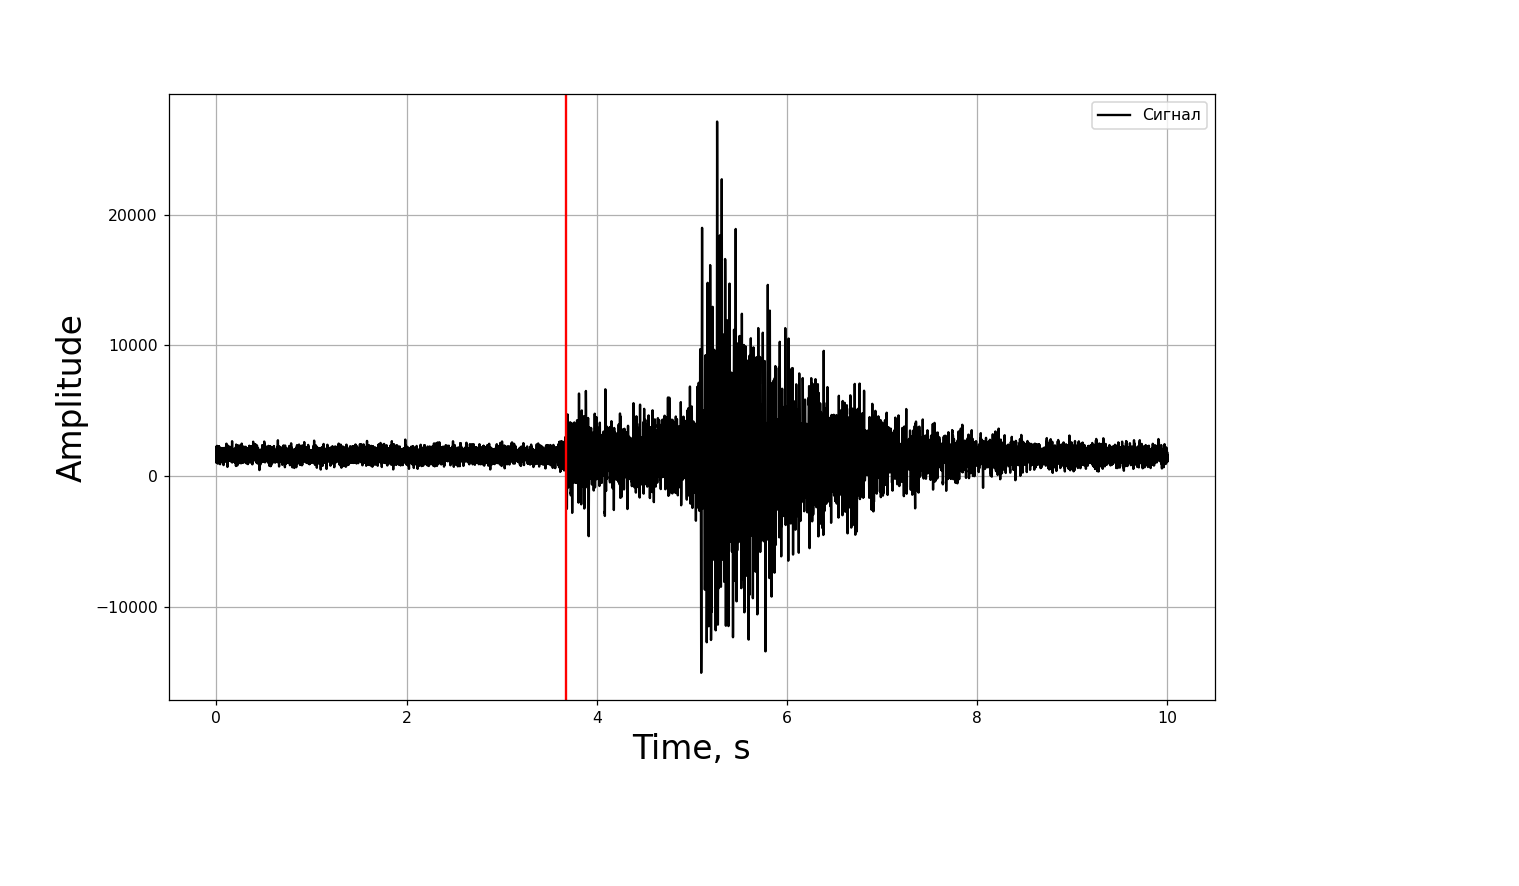

0.728 29.261178452538125


<IPython.core.display.Javascript object>


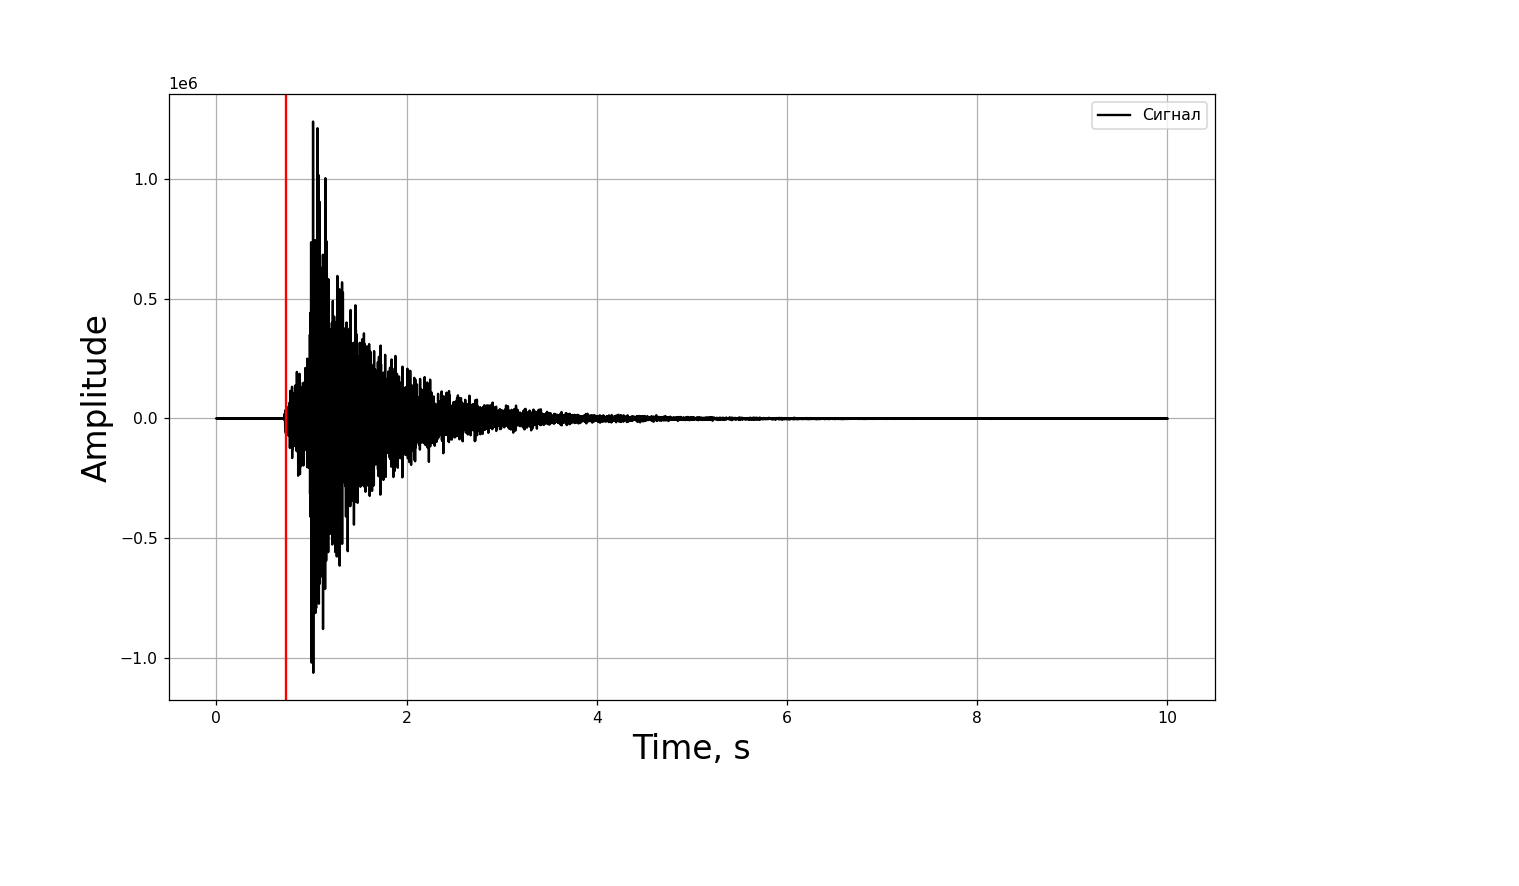

6.115 49.171608276011455


<IPython.core.display.Javascript object>


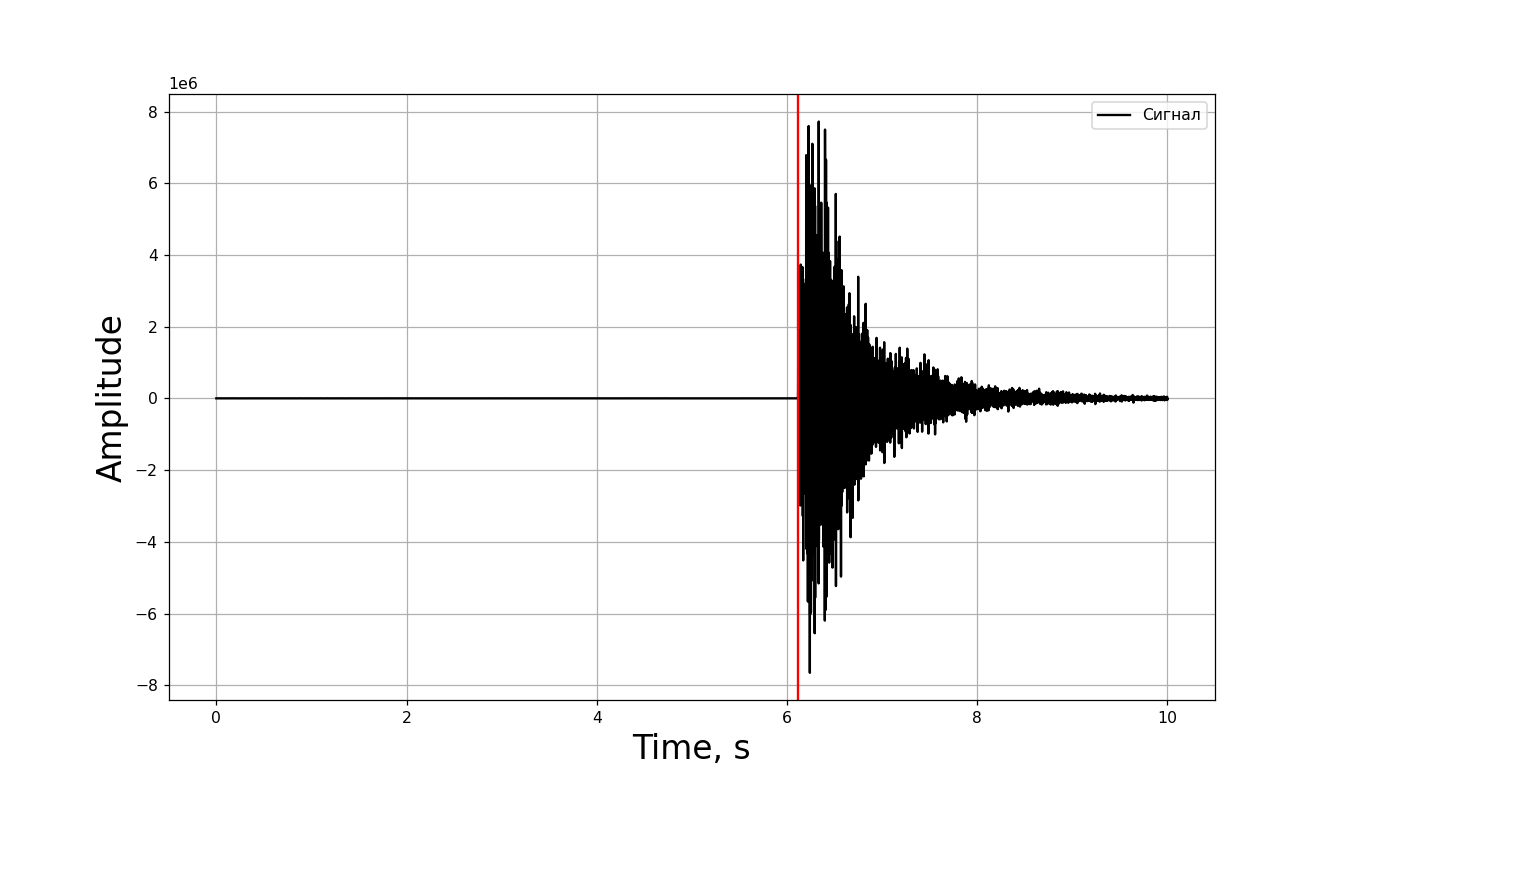

6.897 36.908078974534135


<IPython.core.display.Javascript object>


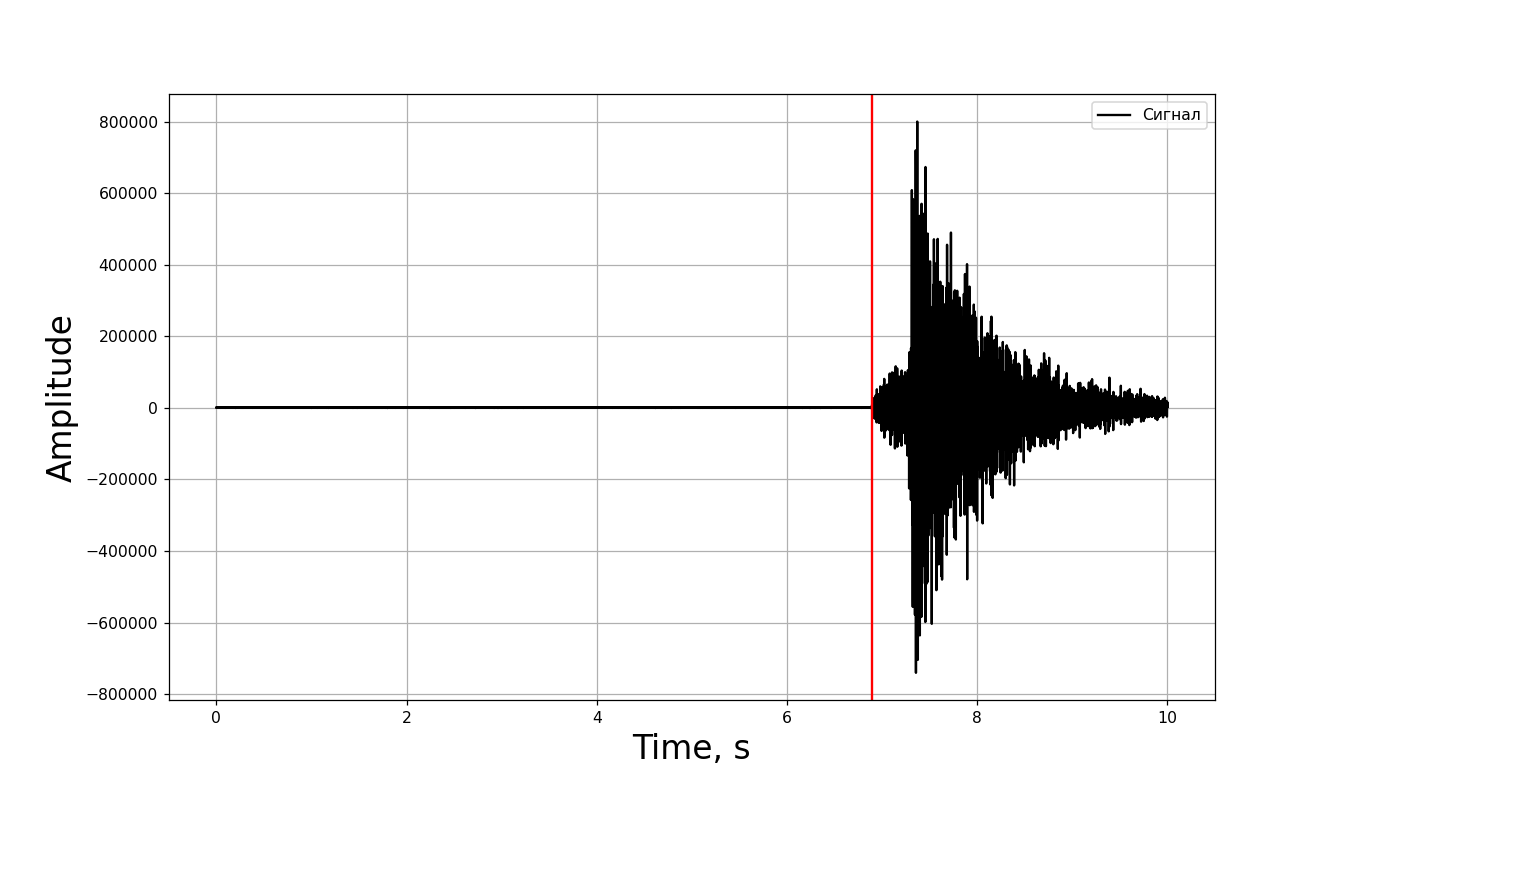

4.266 20.542265192104384


<IPython.core.display.Javascript object>


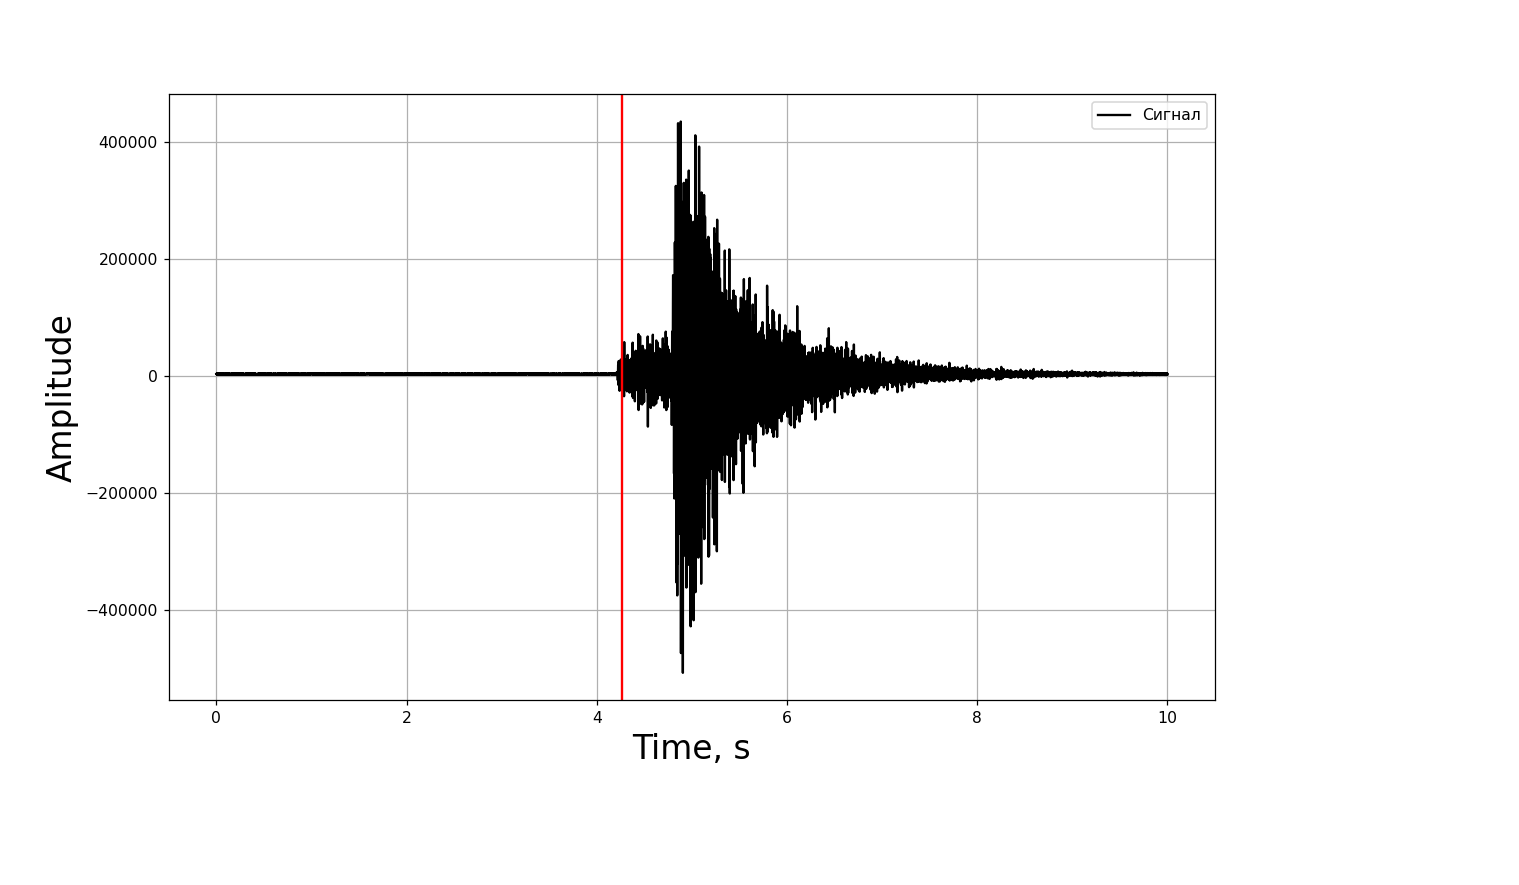

2.785 24.109303501410416


<IPython.core.display.Javascript object>


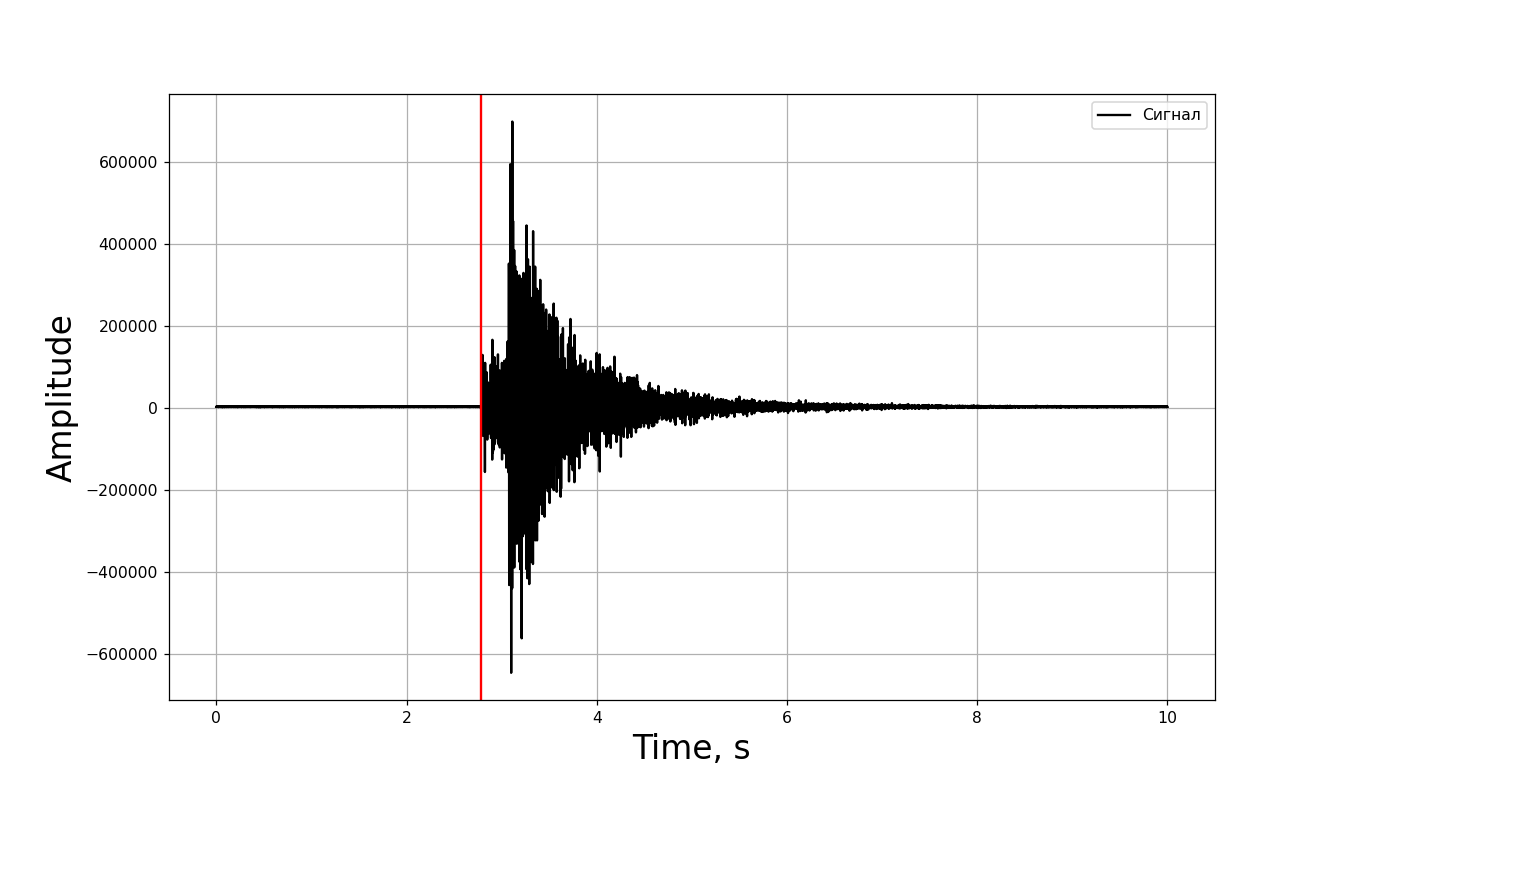

9.0955 32.27059196638769


<IPython.core.display.Javascript object>


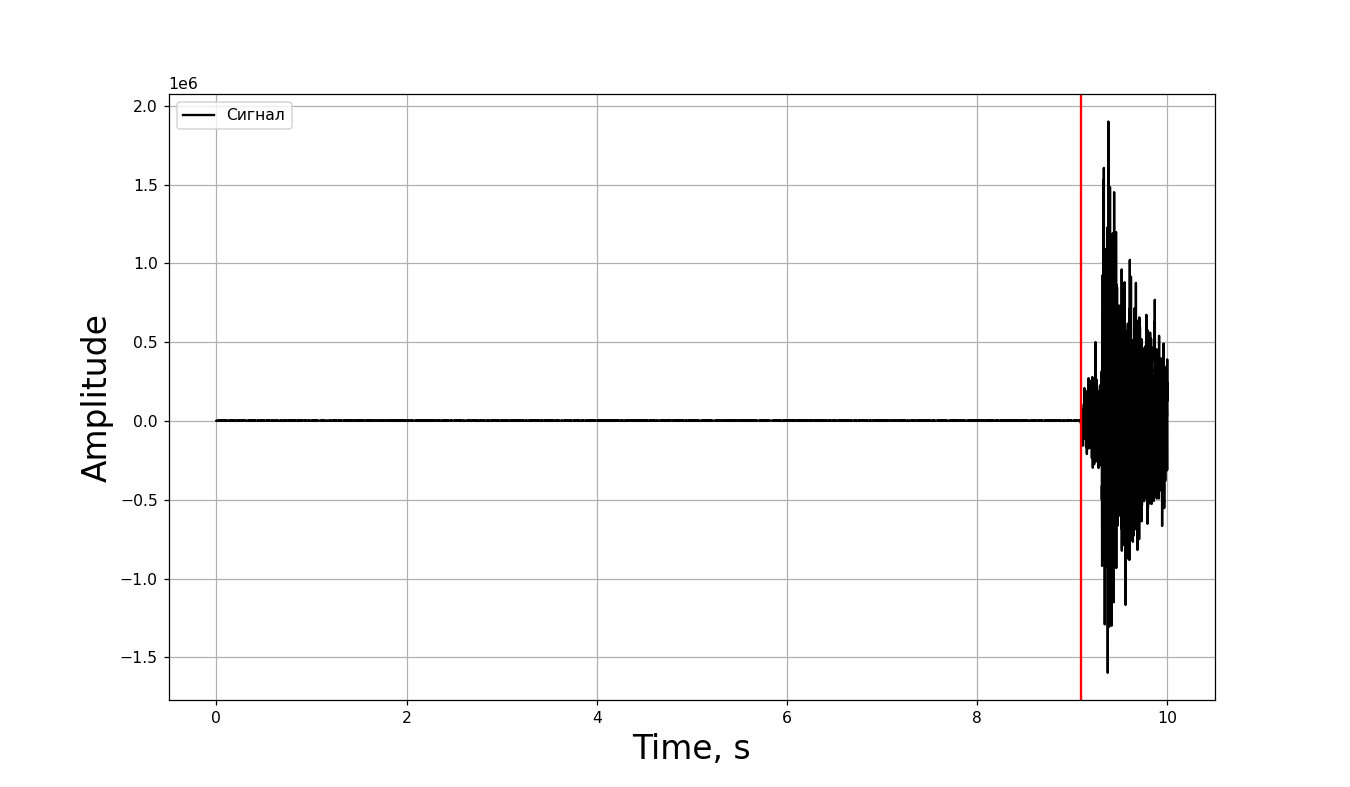

0.0015 -12.498942397088811


<IPython.core.display.Javascript object>


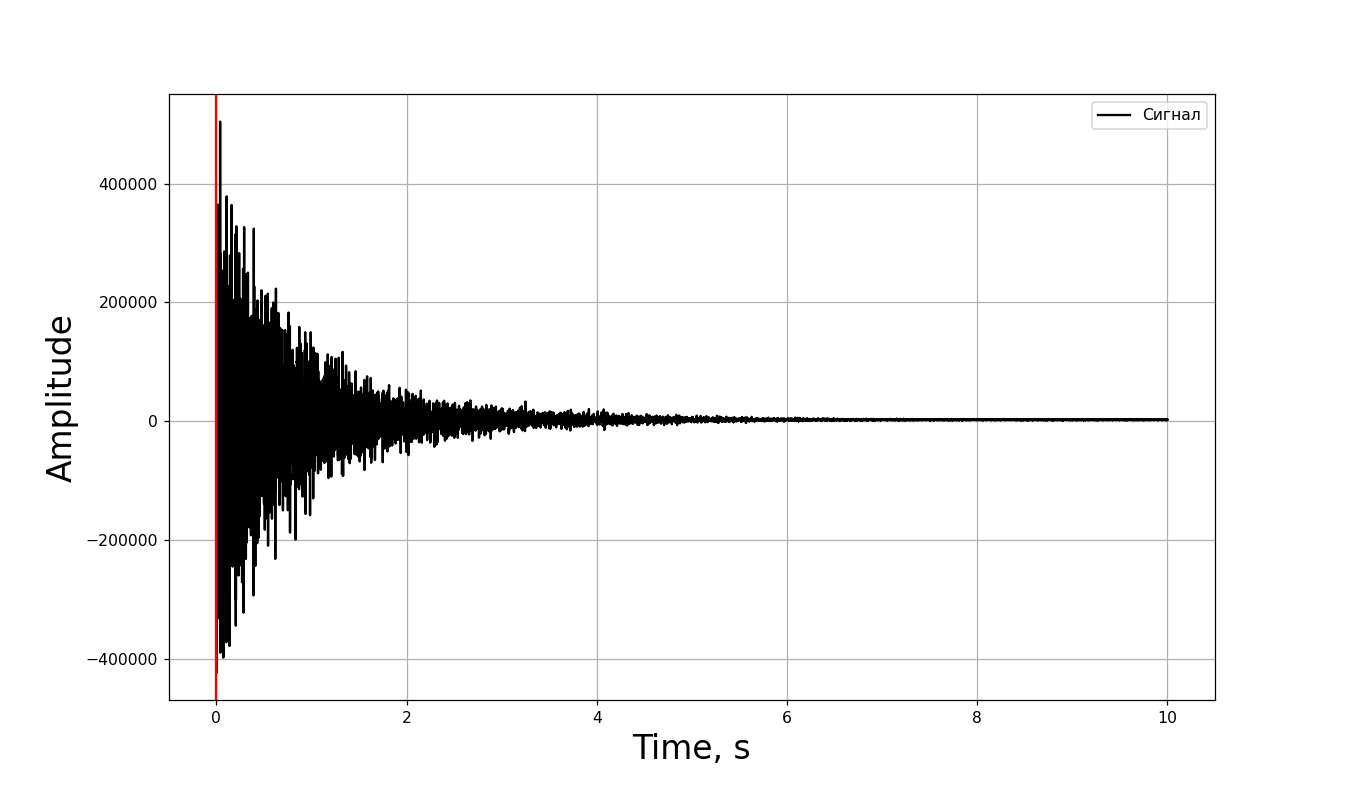

0.0035 3.845590969326737


<IPython.core.display.Javascript object>


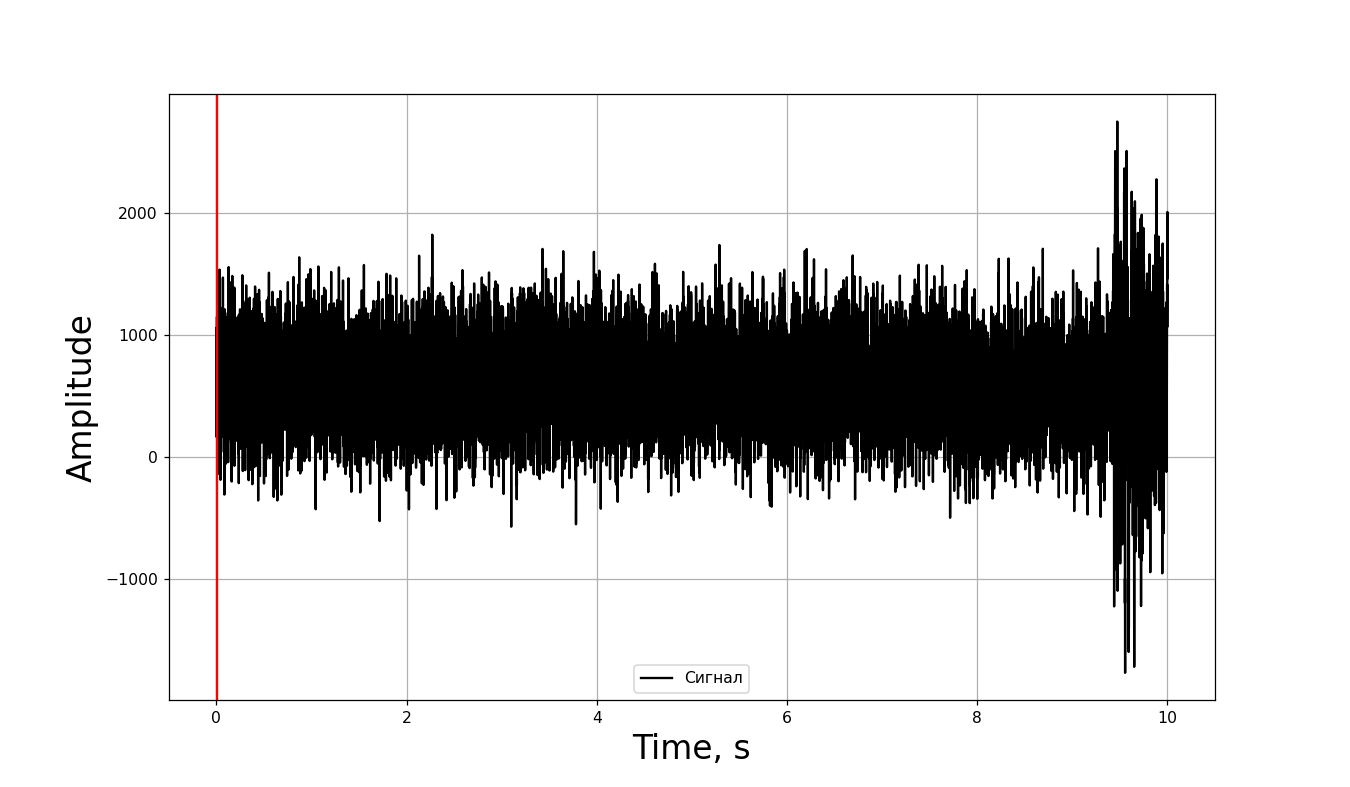

0.004 0.404625076625948


<IPython.core.display.Javascript object>


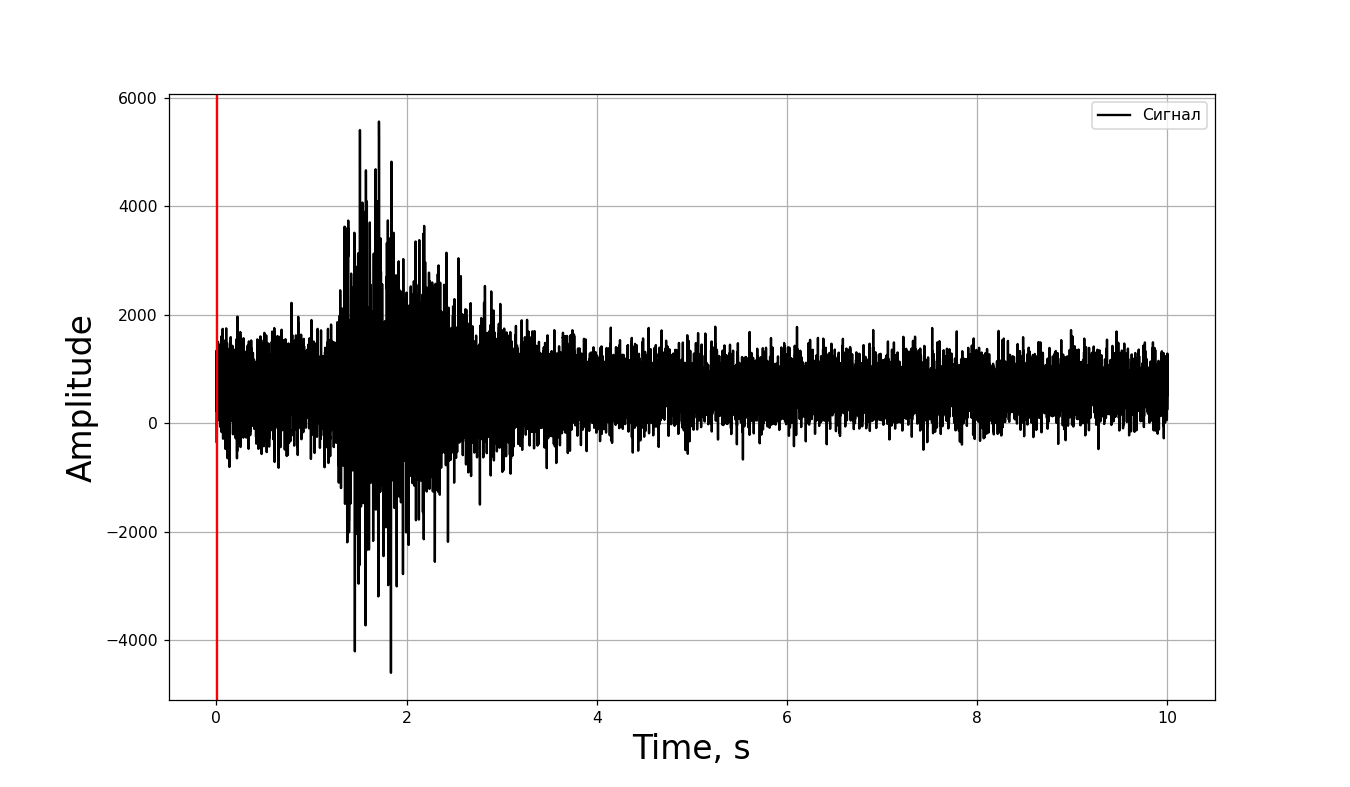

7.0440000000000005 27.812012247258156


<IPython.core.display.Javascript object>


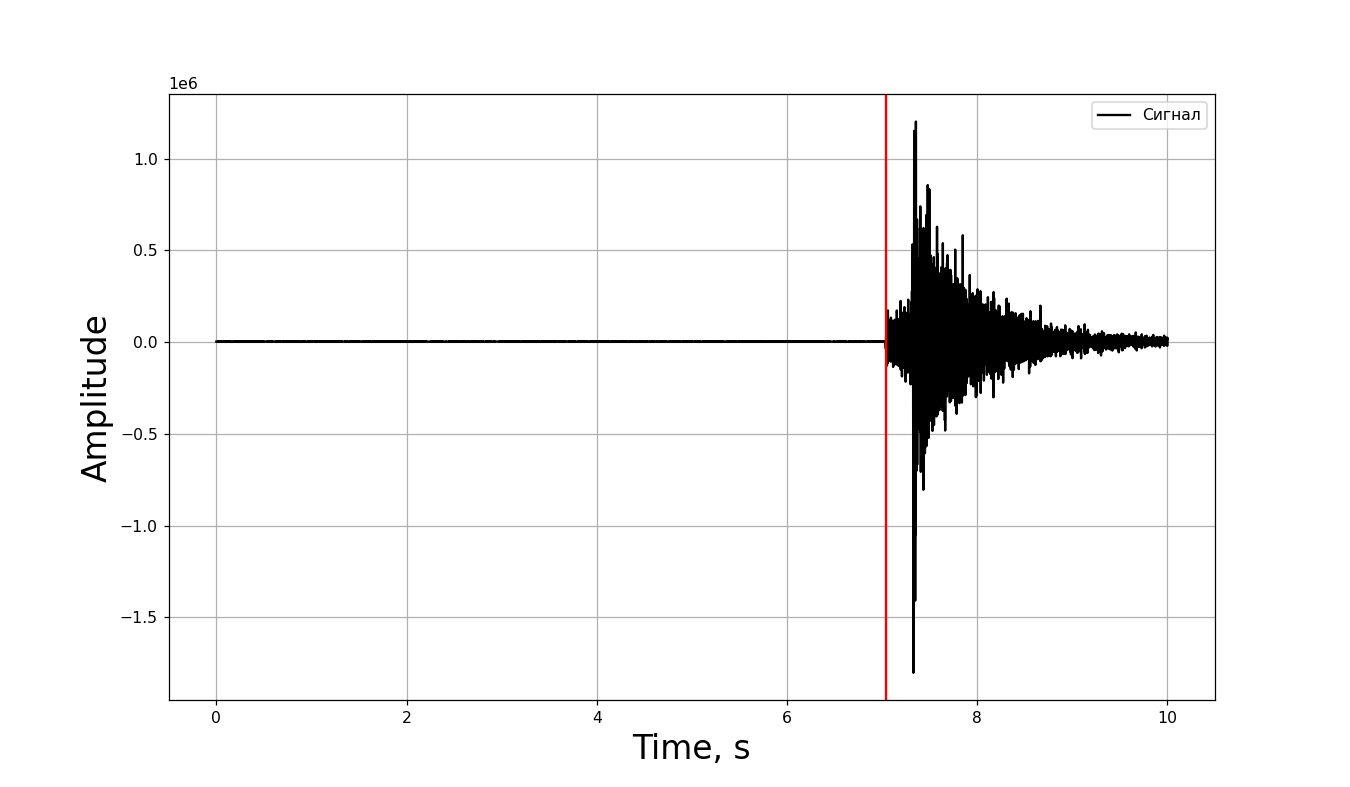

2.5845000000000002 15.790114178138026


<IPython.core.display.Javascript object>


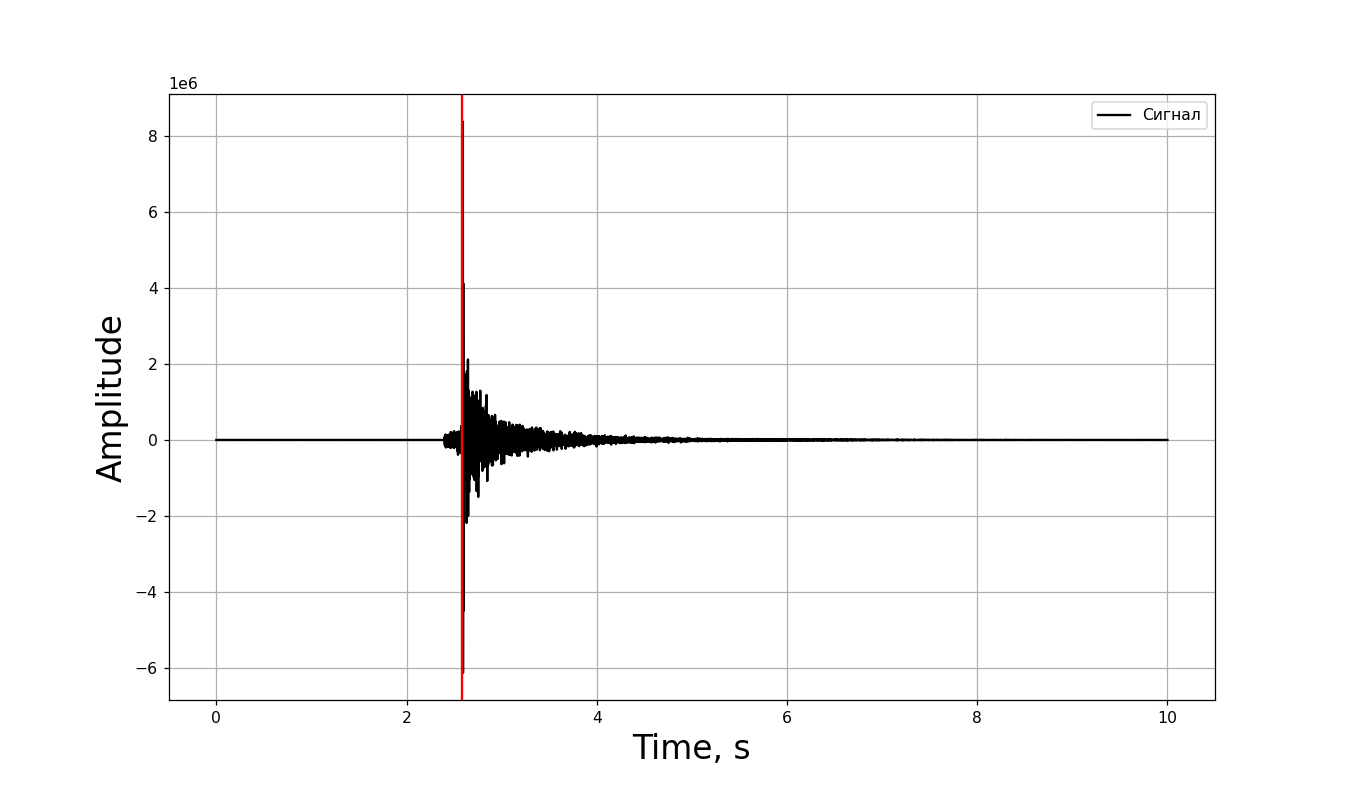

0.025500000000000002 0.23191498131856722


<IPython.core.display.Javascript object>


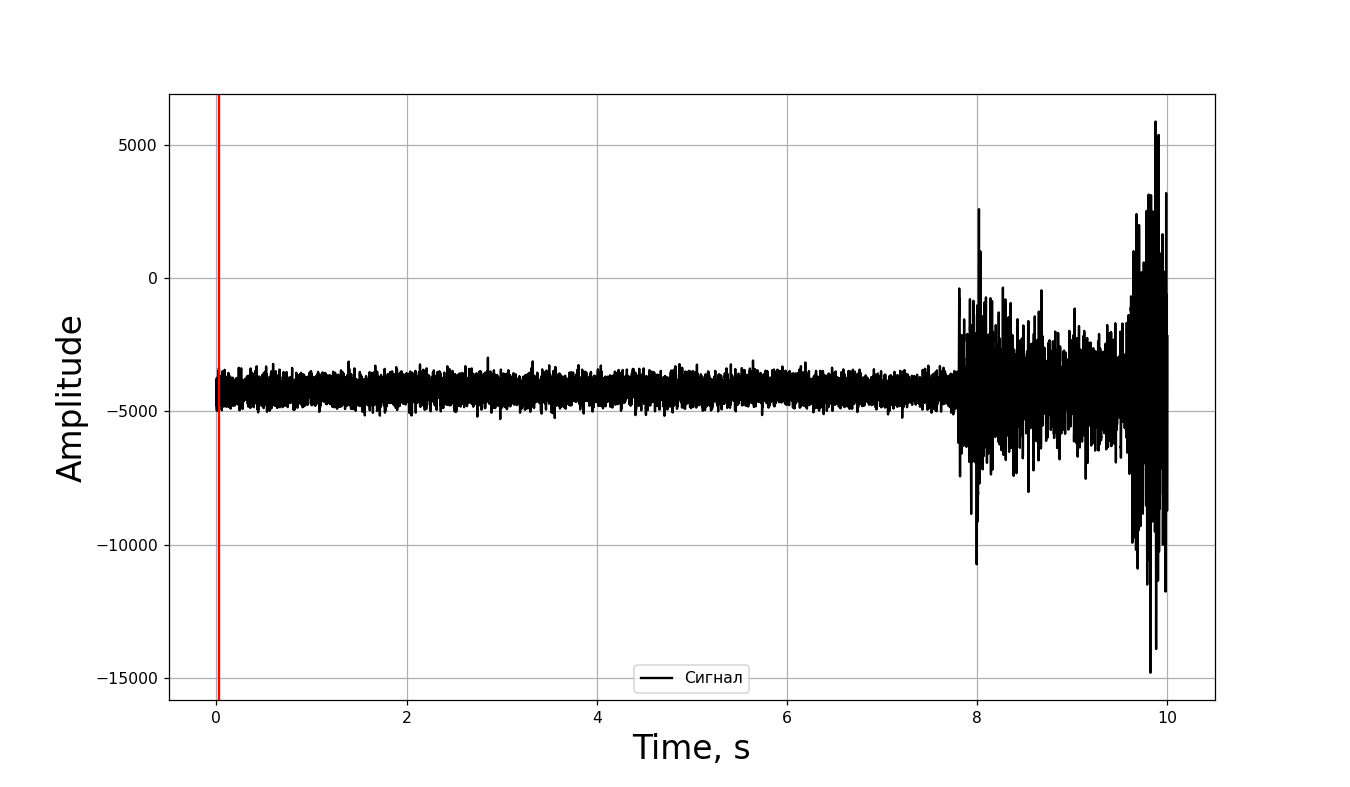

-1.0 -1.0


<IPython.core.display.Javascript object>


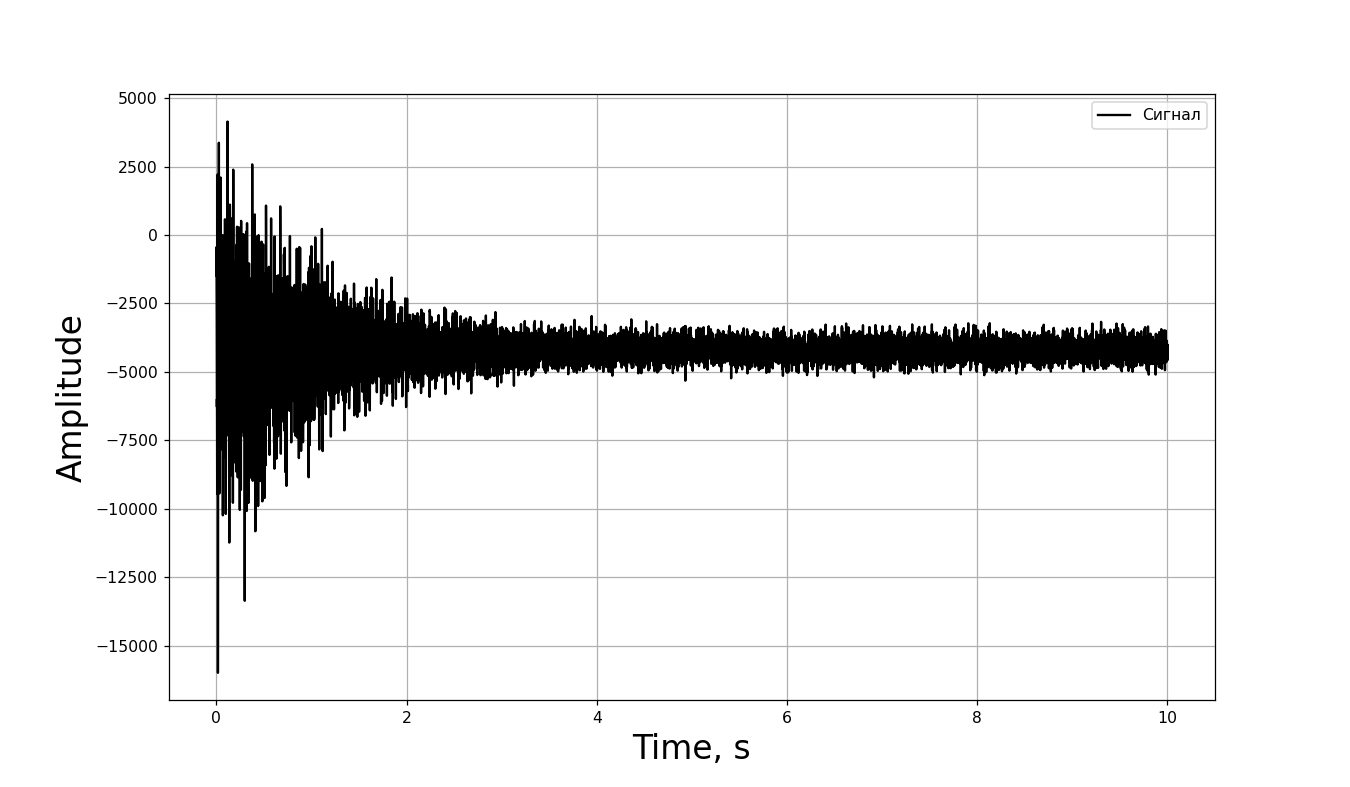

Не определено точно вступление
0.0025 2.2032099645464793


<IPython.core.display.Javascript object>


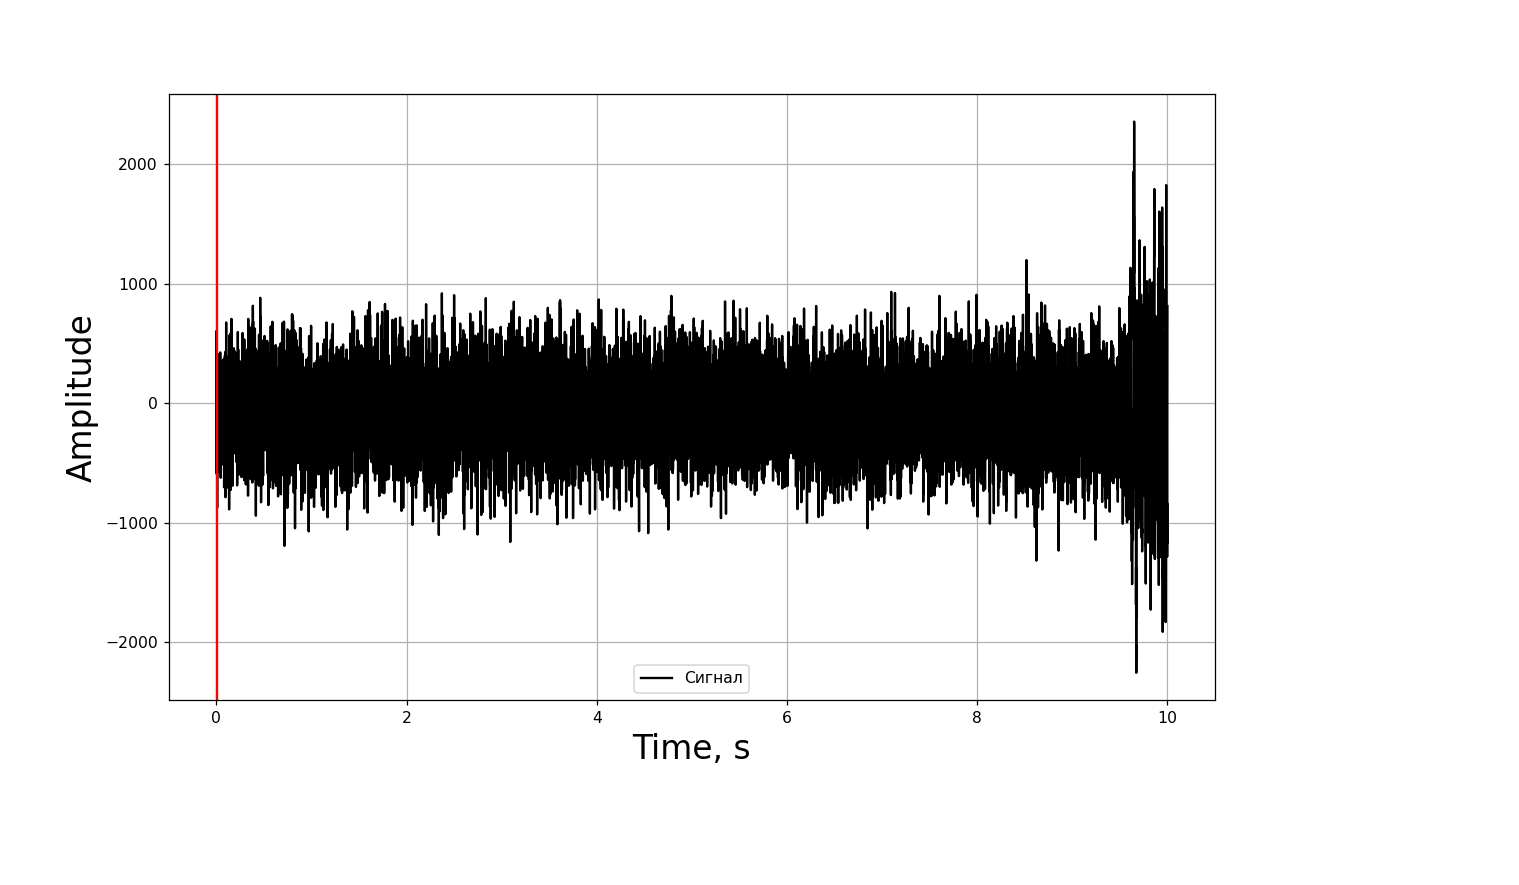

-1.0 -1.0


<IPython.core.display.Javascript object>


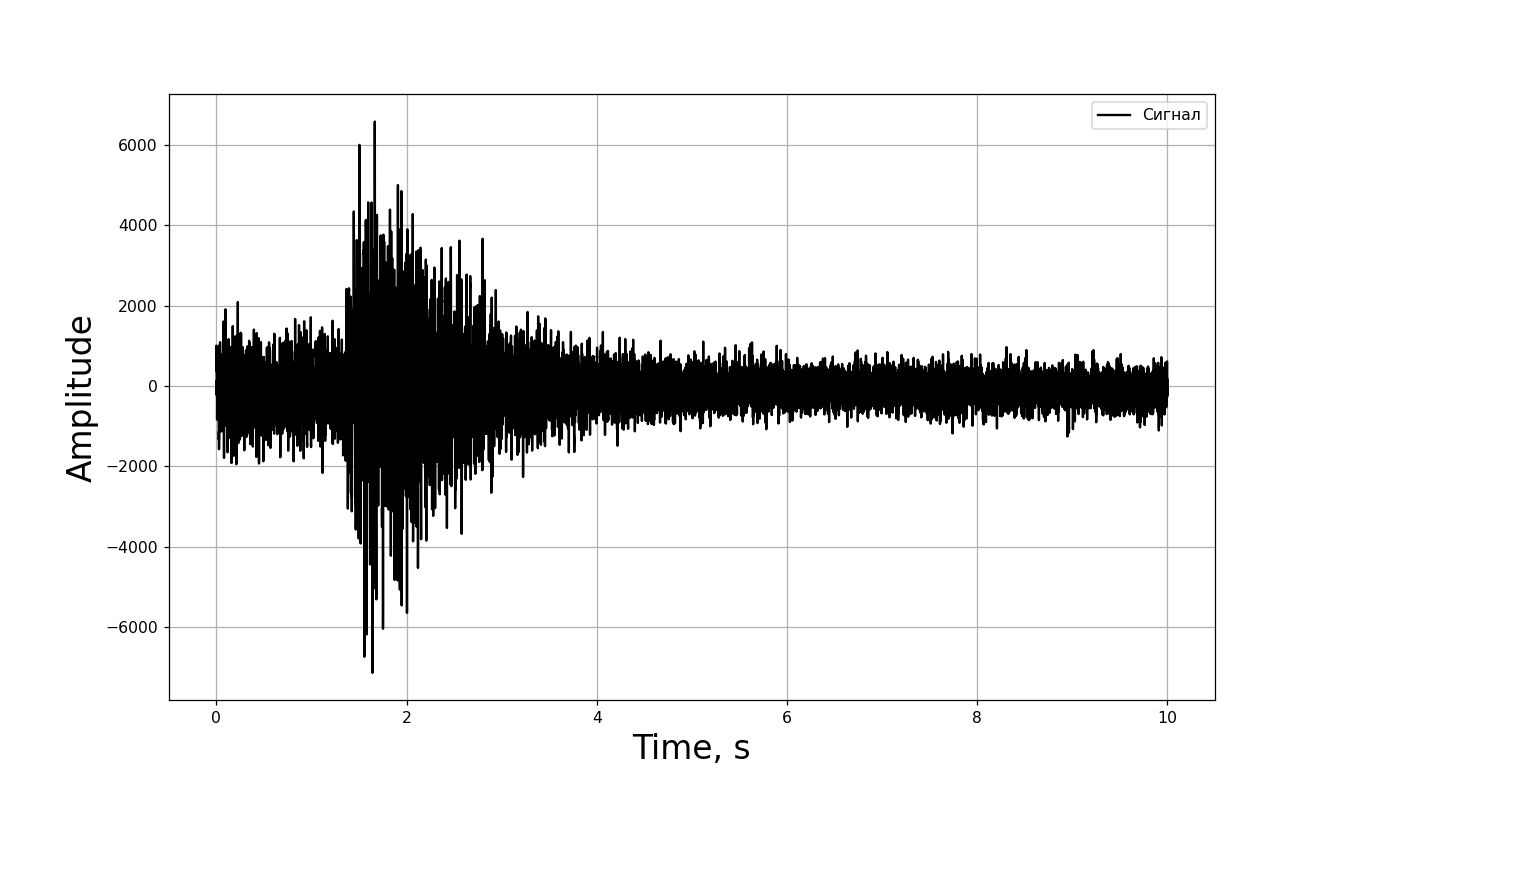

Не определено точно вступление
4.211 28.06129381313522


<IPython.core.display.Javascript object>


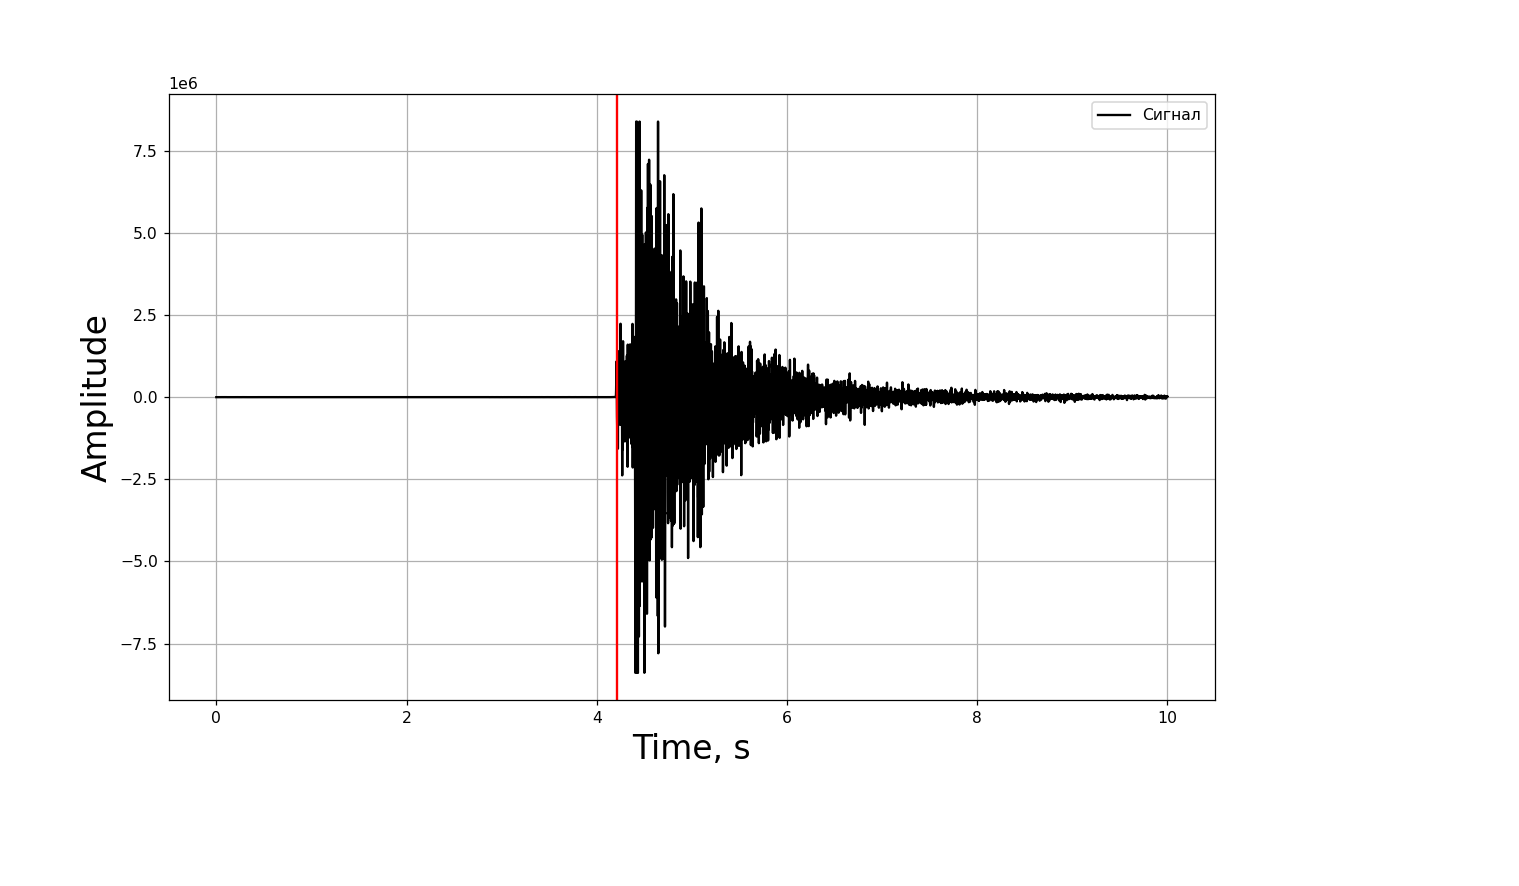

2.2015000000000002 20.603229485629193


<IPython.core.display.Javascript object>


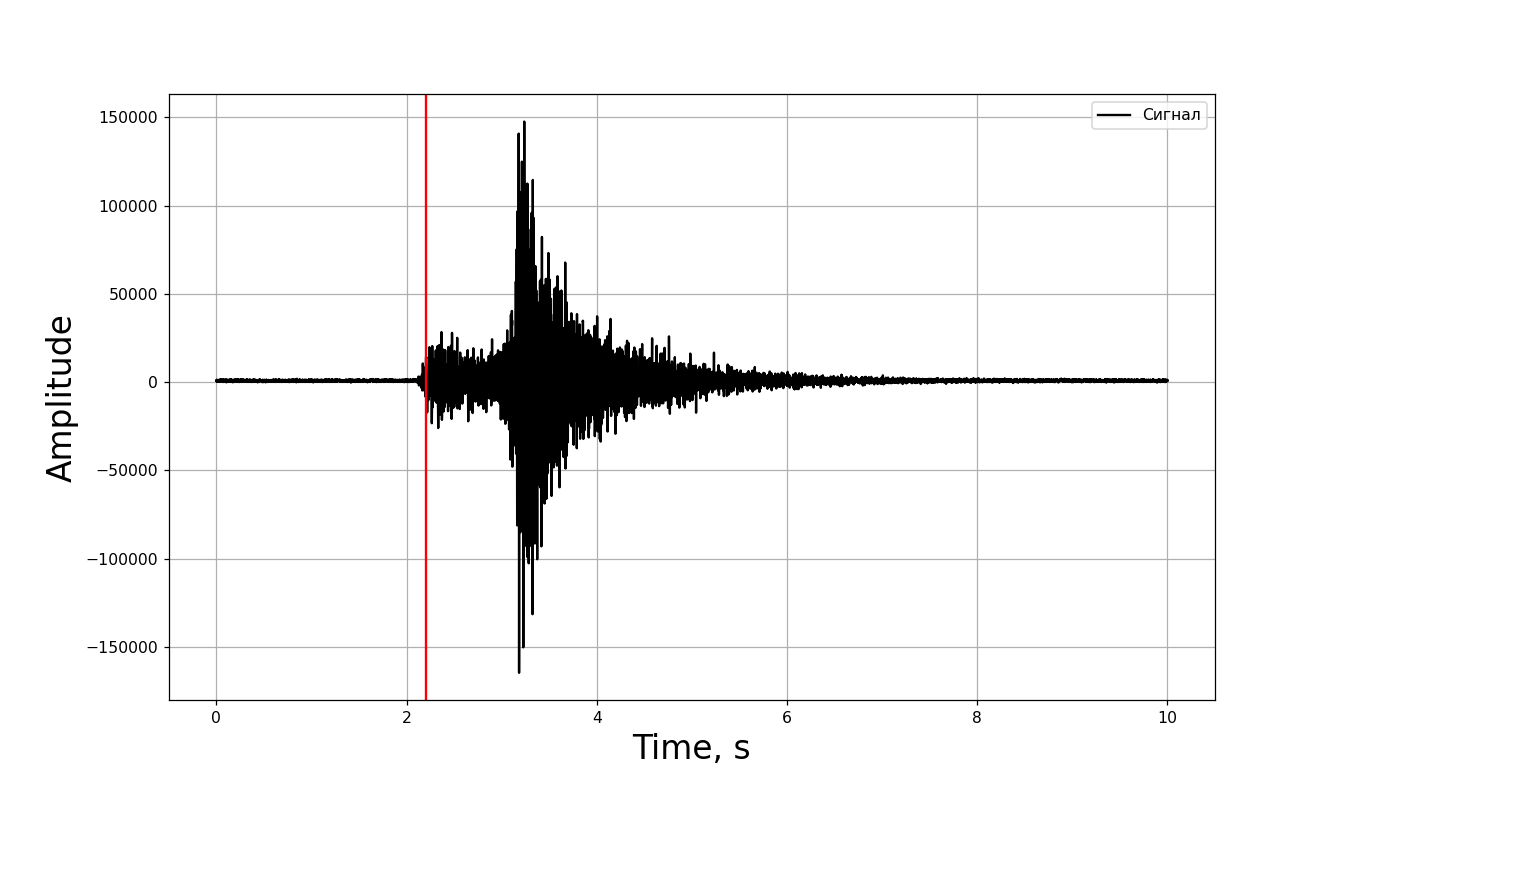

9.2635 31.344147973411523


<IPython.core.display.Javascript object>


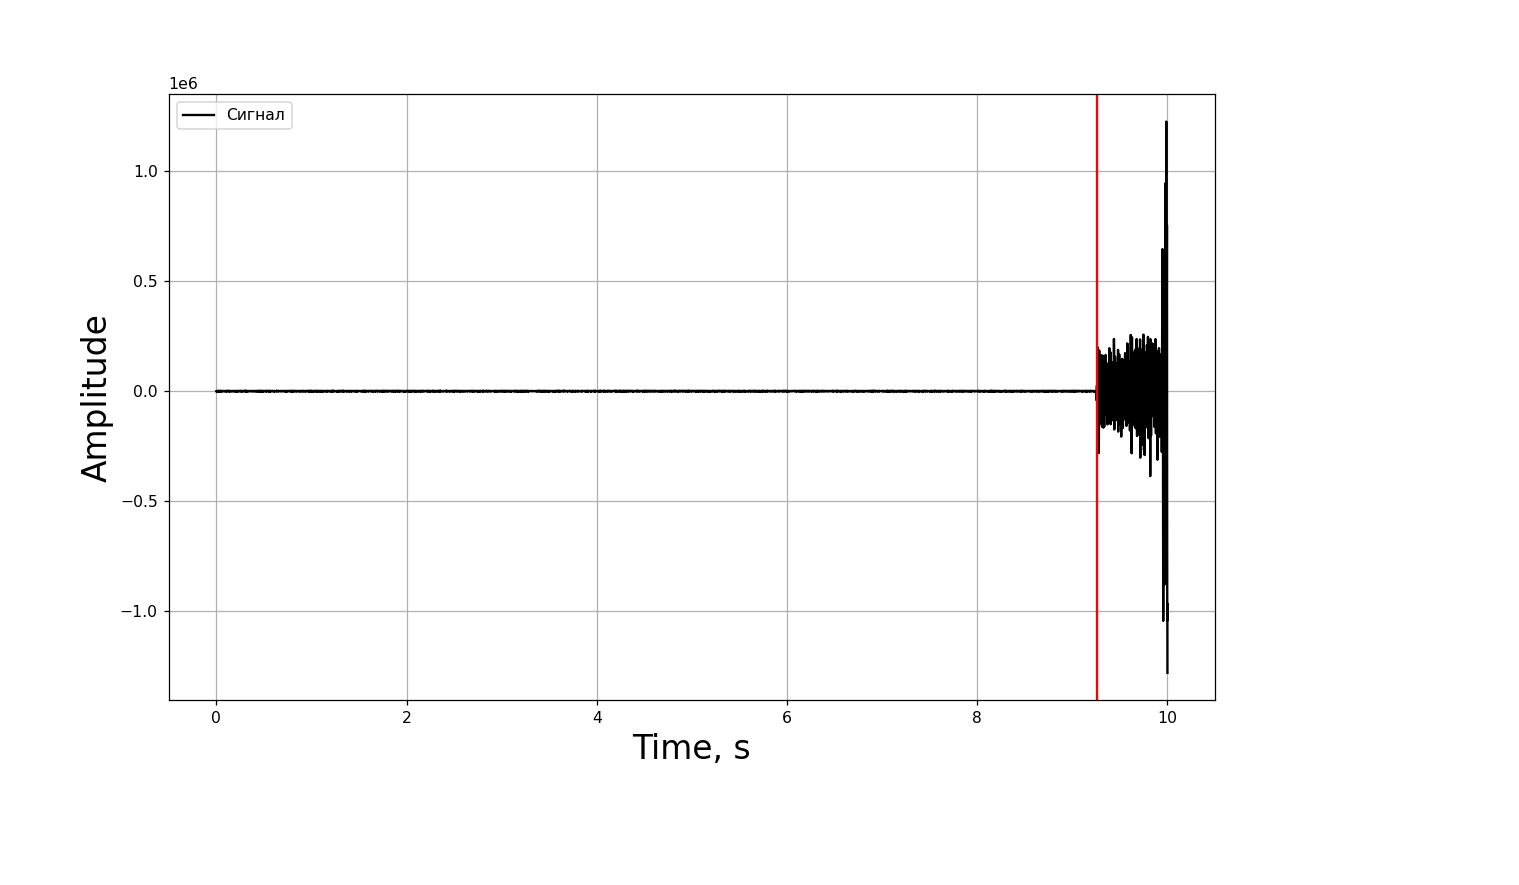

-1.0 -1.0


<IPython.core.display.Javascript object>


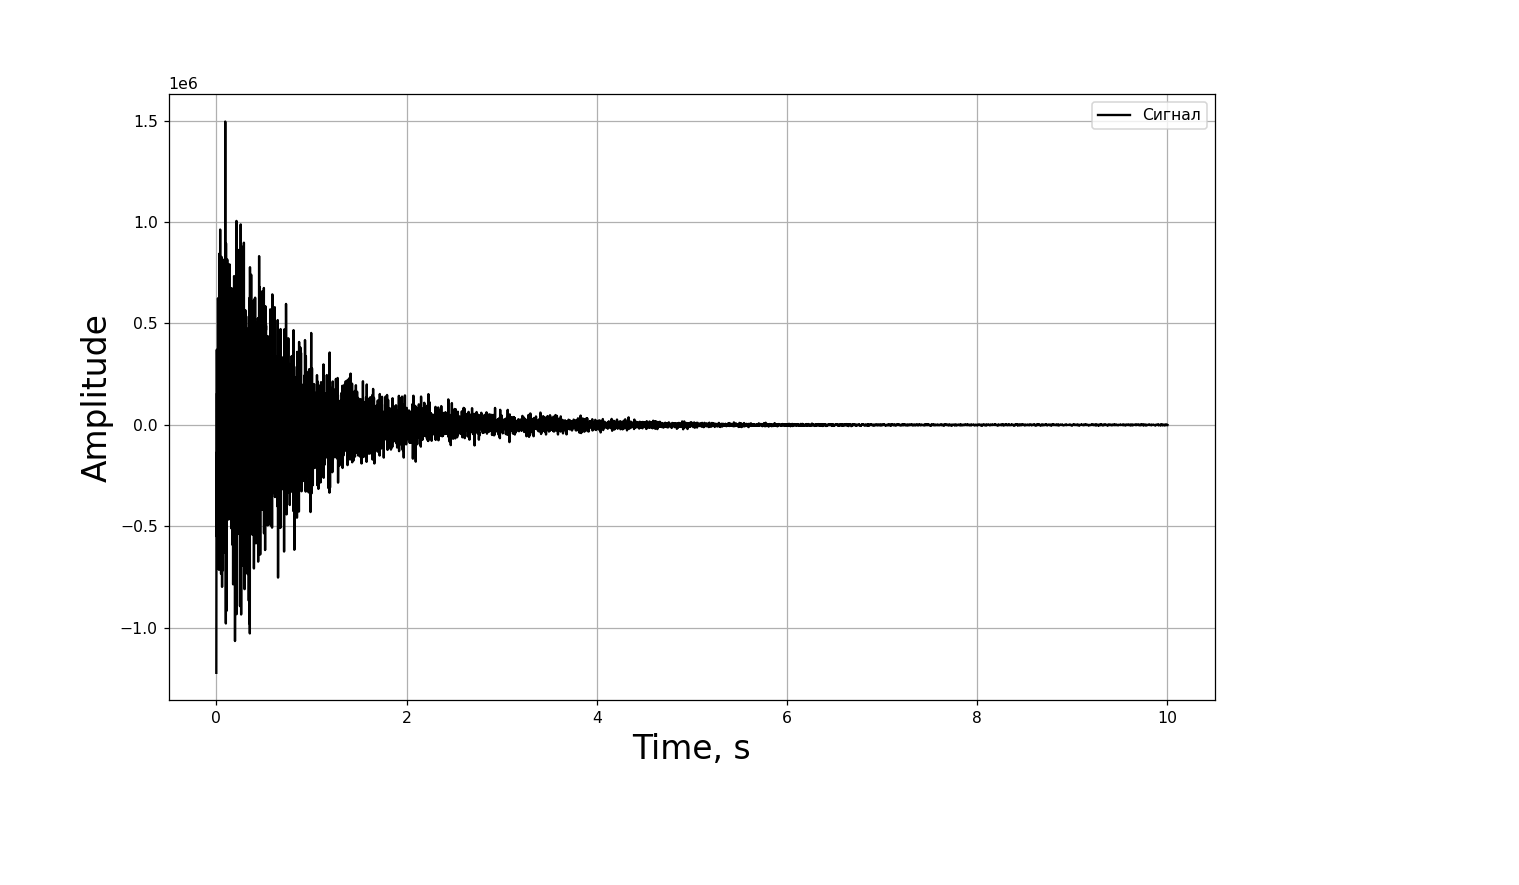

Не определено точно вступление
5.928 22.63053646719674


c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


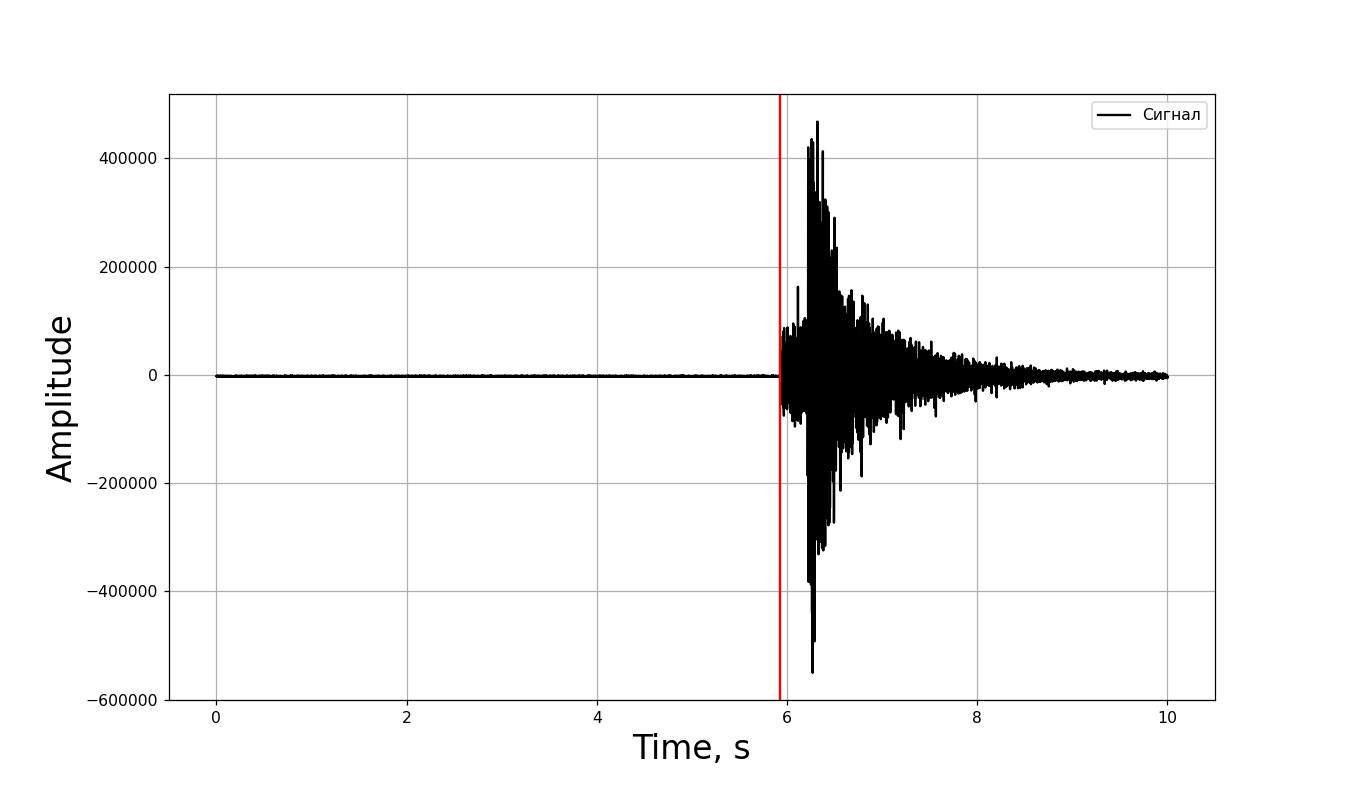

8.2245 29.5935397470253


<IPython.core.display.Javascript object>


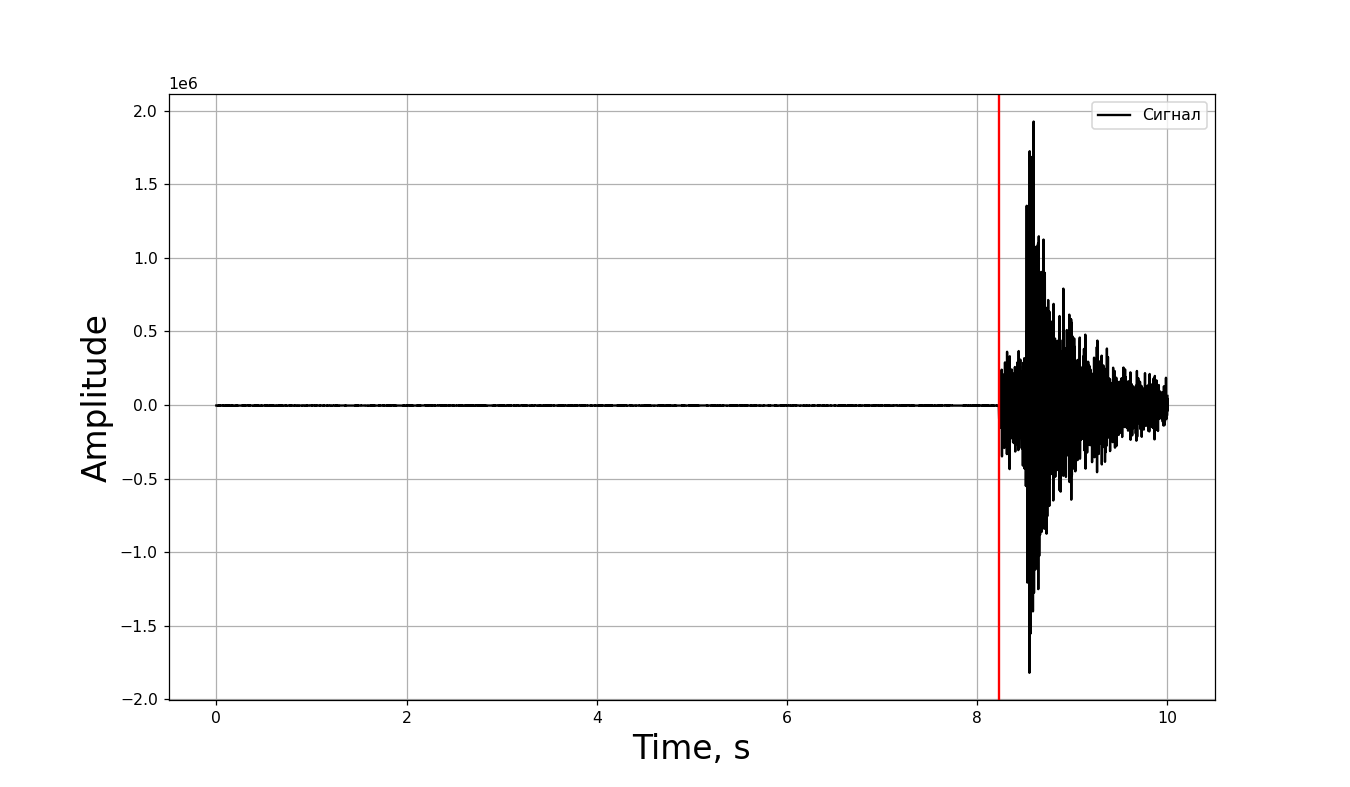

0.005 -0.3281649564029472


<IPython.core.display.Javascript object>


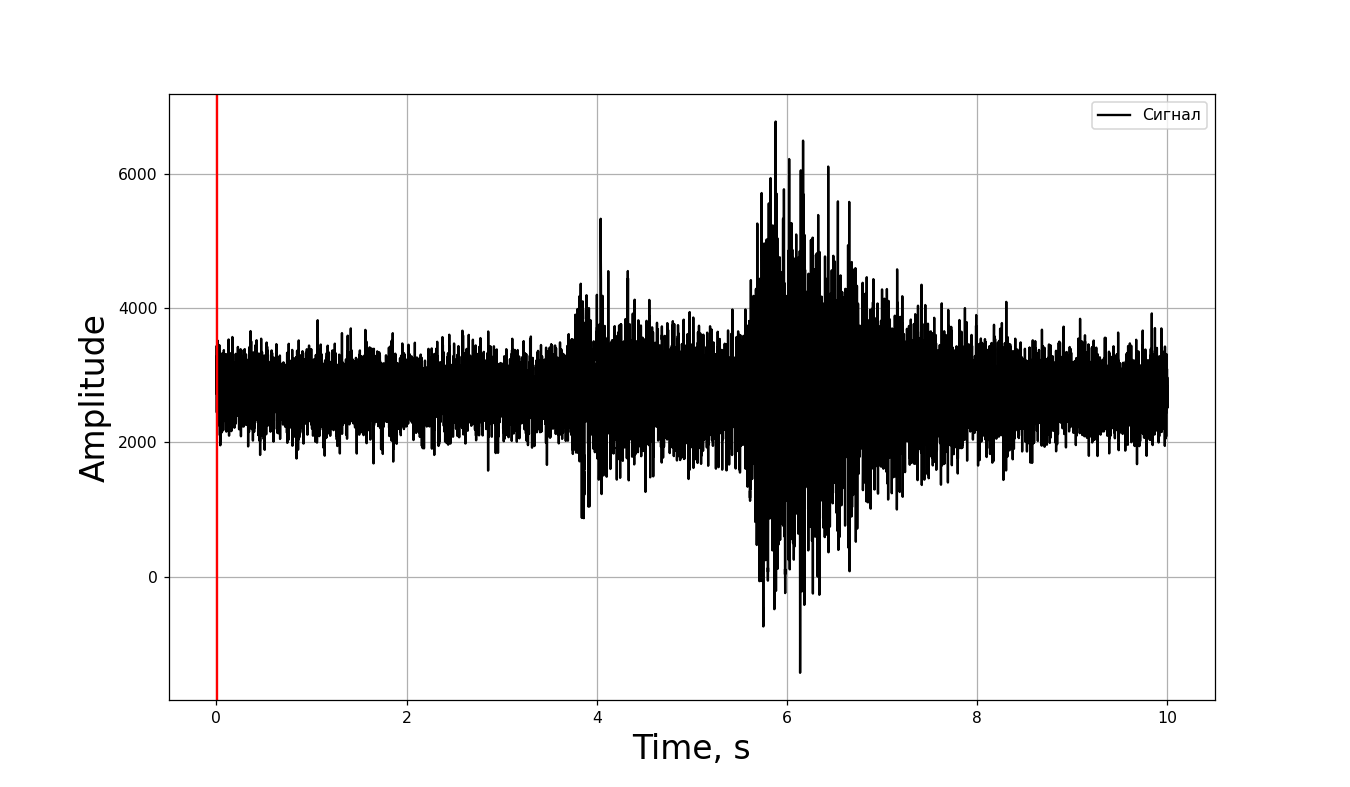

2.1285 24.34250480769189


<IPython.core.display.Javascript object>


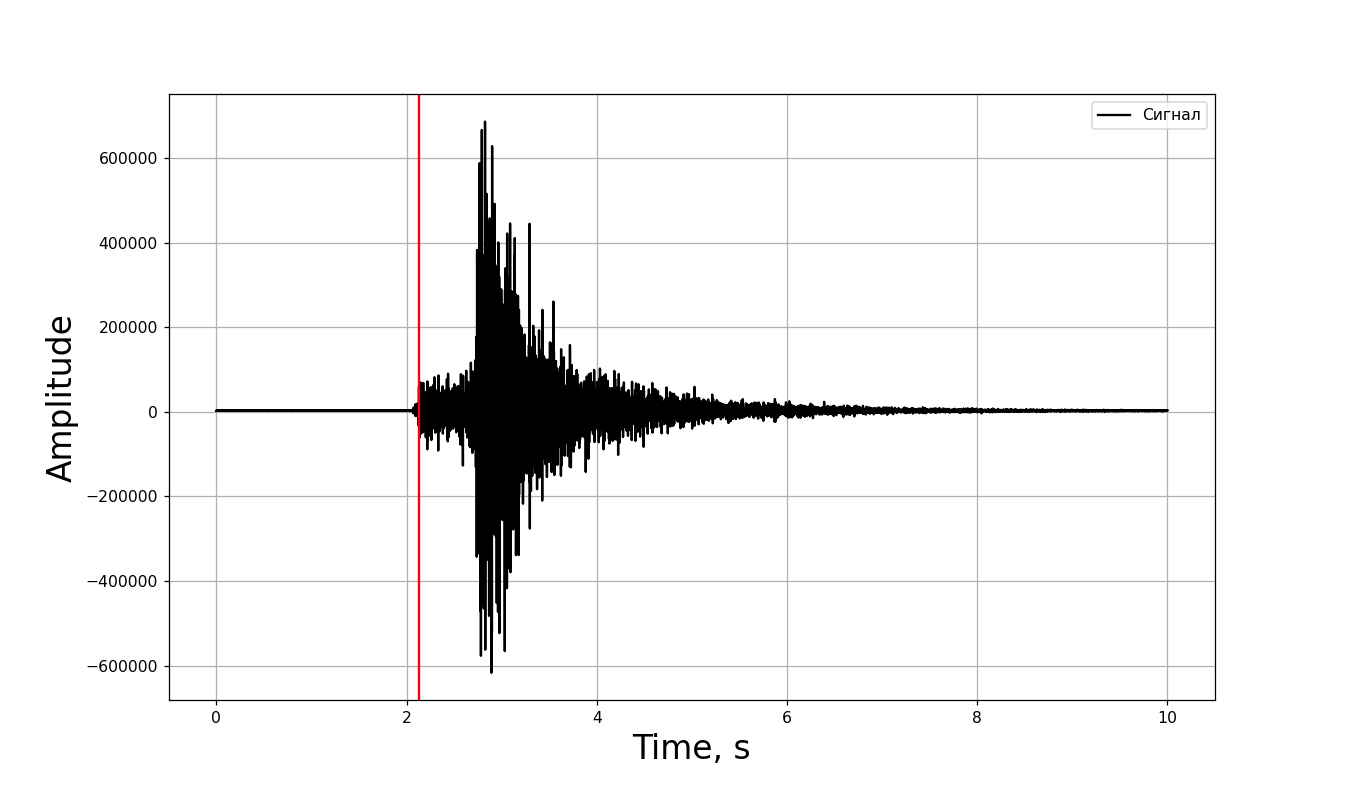

3.1175 0.9012043567110473


<IPython.core.display.Javascript object>


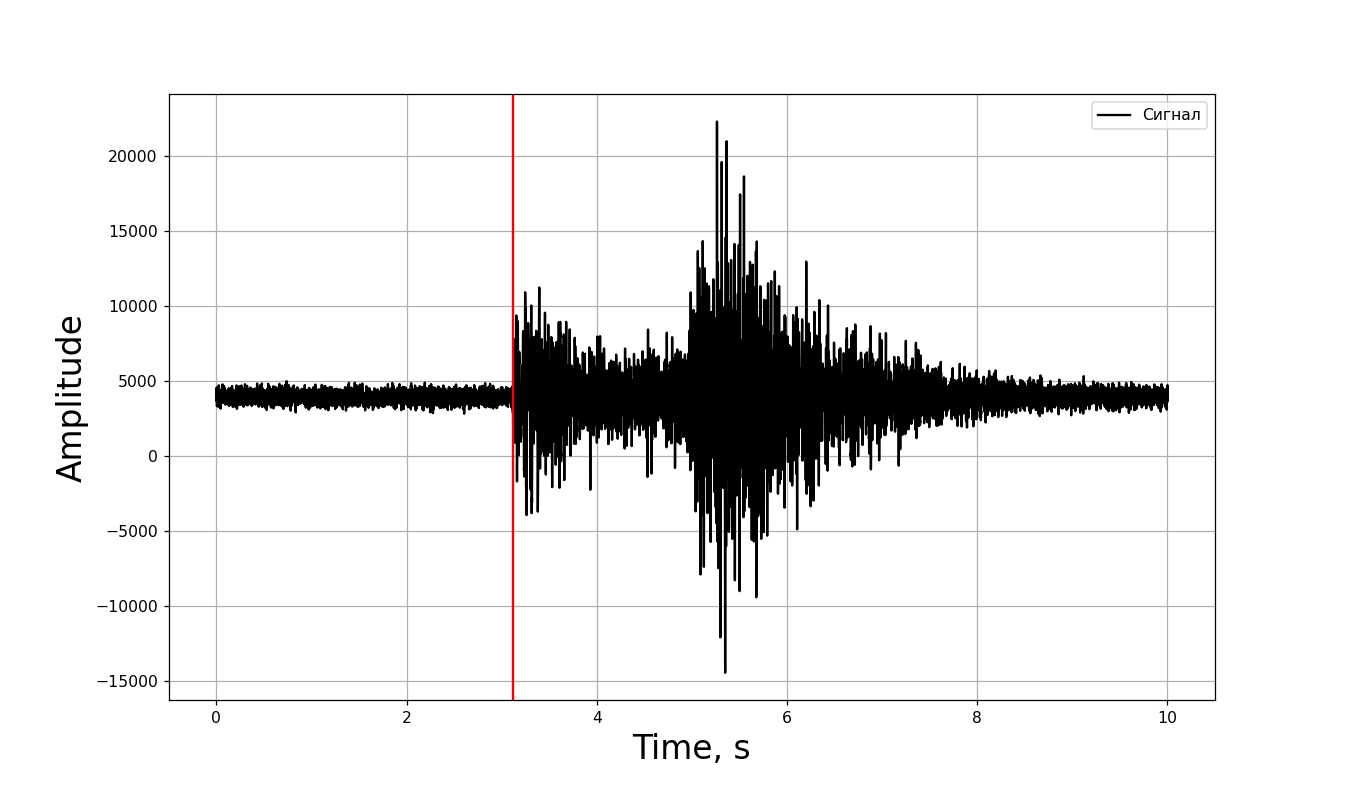

0.0175 0.12613816946958153


<IPython.core.display.Javascript object>


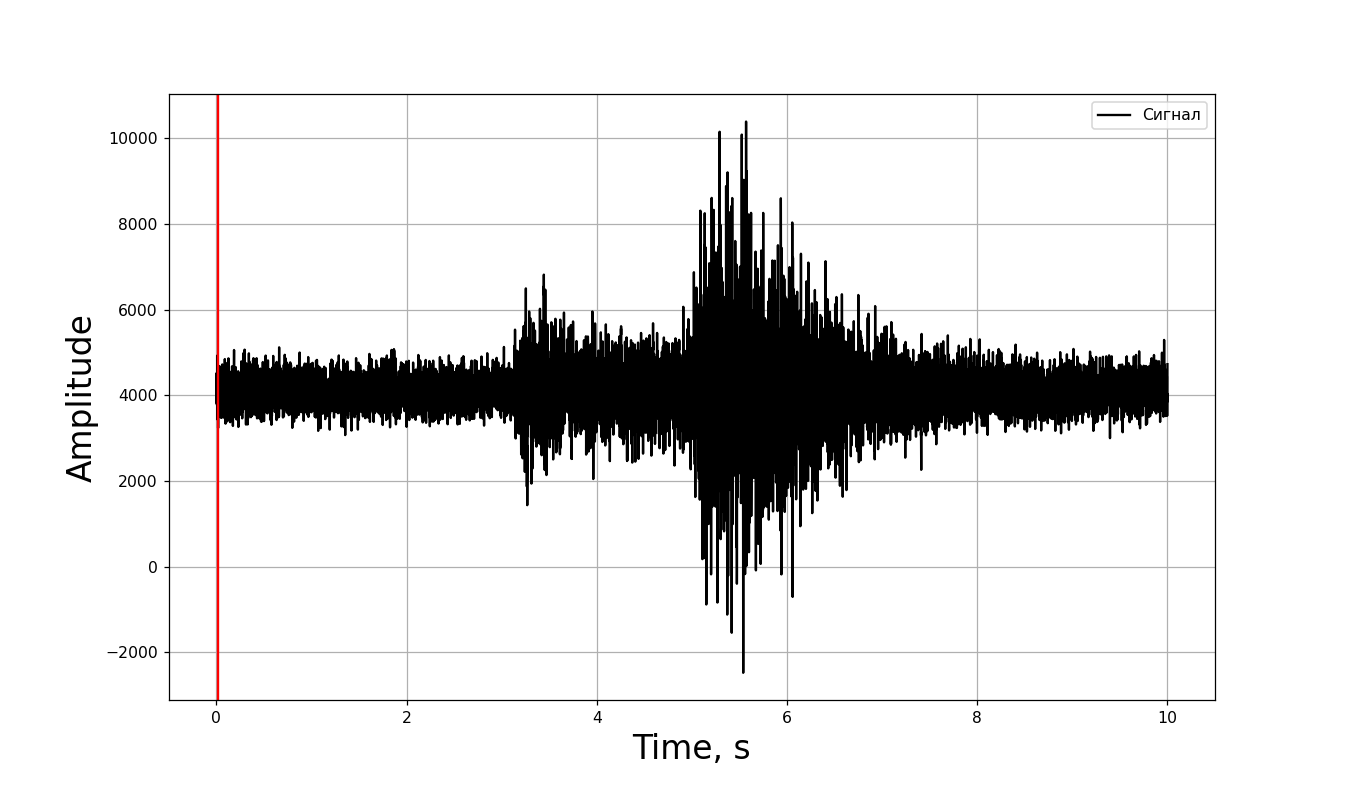

0.039 -0.12509777319306226


<IPython.core.display.Javascript object>


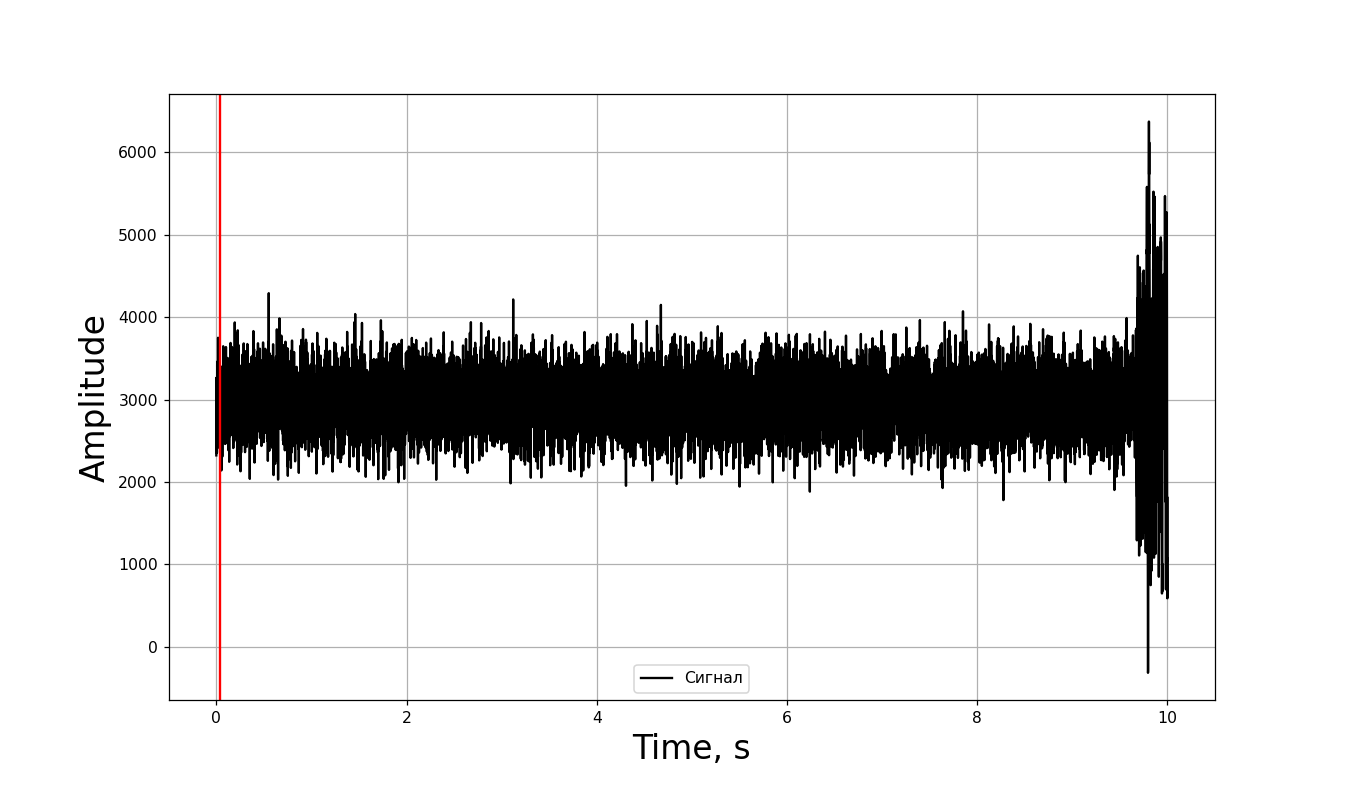

0.0025 1.5020098681800236


<IPython.core.display.Javascript object>


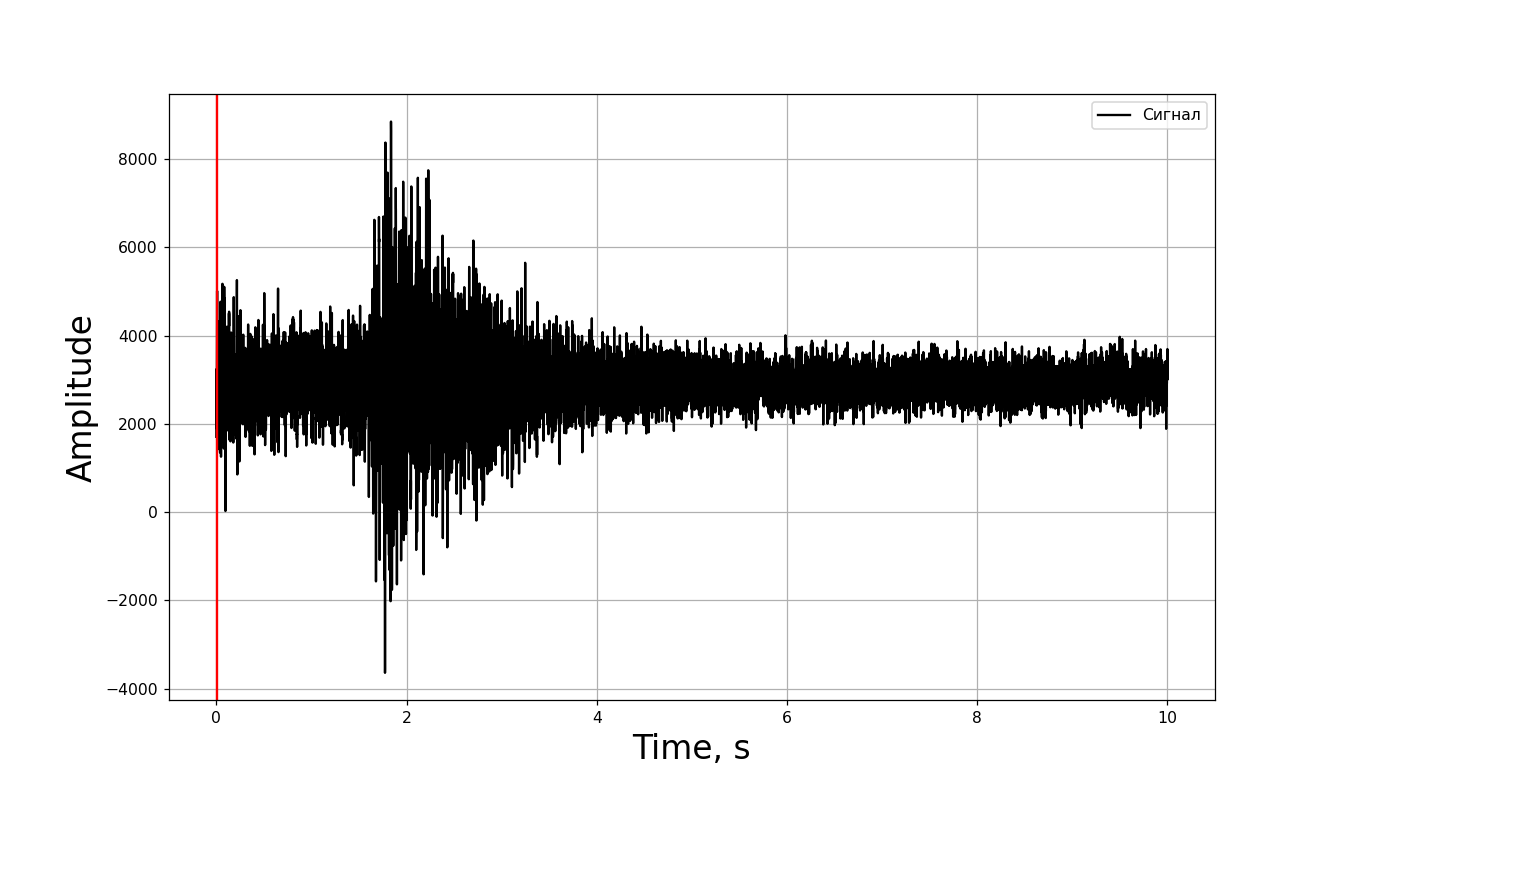

2.019 26.1248943945133


<IPython.core.display.Javascript object>


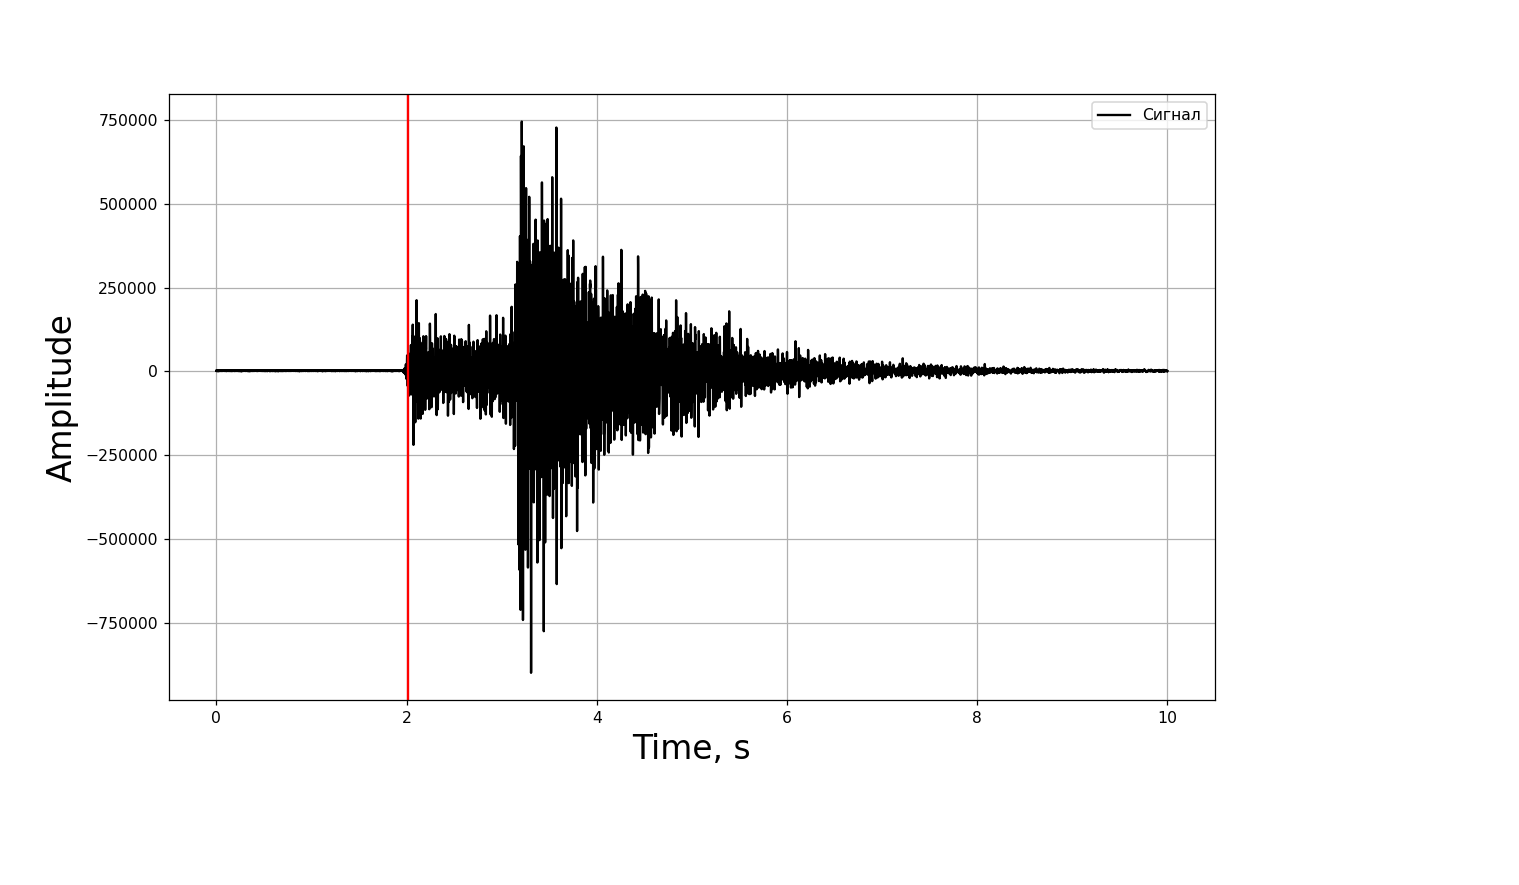

In [7]:
import PphasePicker
def pick_test(x, dt, to_peak=False, nbins=int(2./dt), Tn=0.01):
    (t_pick, snr) = PphasePicker.calculatePphasePicker(x, dt, to_peak=to_peak, nbins=nbins, Tn=Tn) # меняем каналы!!!!
    print(t_pick, snr)
    x_times = np.arange(0, len(x))*dt # меняем каналы!!!!
    plt.figure(figsize=(12, 7))
    plt.plot(x_times, x, label='Сигнал',color='black')
    plt.xlabel('Time, s', fontsize=21)
    plt.ylabel('Amplitude',fontsize=21)
    # plt.title(station_name + ' ' + str(time_start))
    plt.grid()
    plt.legend()
    if t_pick == -1:
        print('Не определено точно вступление')
    else:
        plt.axvline(t_pick, color='red', label='Вступление P-волны')
    plt.show()

to_peak=False
nbins=200
Tn=0.05

# for i_f in range(n_files):
pick_test(datas[7, 29], dt, to_peak=to_peak, nbins=nbins, Tn=Tn)

# считаем вступление, создаём даты, рисуем рисунки
